# import packages and data

In [147]:
# note that the order of points in GeoPandas is longitude, latitude 
# (opposite order from that of many data sets)

import geopandas
import shapely.geometry
import shapely.ops
import pyproj
import pandas

import time
import numpy

import pygsheets
import cartopy
import matplotlib.pyplot as mp
import matplotlib

# gemplot variables

In [148]:
footer_color = "#222222"
footer_lineheight = 1.2
footer_fontsize = 14

# default height of a figure is 450 pixels

# gemstyle does this:
# specify a base_ratio, then set base_size = base_ratio*16
# 1. add 6 line margin all the way around
# 2. color of title is "#222222", margin 6666, size=base_size*1.5, lineheight=1.35, bold font
# 3. color of subtitle is "#333333", margin 0666, padding top=12, bottom=12, size=base_size*1.15, lineheight=1.45
# 4. set caption info as linehight=1.2, size=base_size*0.875, color="#222222", margin=18,6,6,6

base_ratio = 1.0
base_size = base_ratio * 16
color_title = "#222222"
color_subtitle = "#333333"
color_grid = "#cbcbcb"

text_weight_normal = 400
text_weight_bold = 700

# save fig
#' @keywords save_gem_plot
#' @examples
#' save_gem_plot(
#' plot_grid = line_plot_with_gem_footer,
#' save_filepath = "filename_that_my_plot_should_be_saved_to-nc.png",
#' width_pixels = 770,
#' height_pixels = 540,
#' resolution = 4
#' )
#'
#' @export
# save plot function - now separated from finalise_plot function and setting the resolution as part of the arguments
# save_gem_plot <- function (plot_grid, save_filepath, width_pixels = 640, height_pixels = 450, resolution = 3) {
#   grid::grid.draw(plot_grid)

#   #save it
#   ggplot2::ggsave(plot=plot_grid,
#                   width= (width_pixels/72),
#                   height= (height_pixels/72),
#                   dpi = resolution * 100,
#                   filename = save_filepath,
#                   bg="white")
# }

#width_pixels = 640 # default
#height_pixels = 450 # default

# map color variables

In [149]:
construction_color = matplotlib.colormaps['Reds'](0.75)
proposed_color = matplotlib.colormaps['Oranges'](0.25)
#operating_color = '#c2c2c2'
other_land_color = '#ffffff'
other_land_alpha = 1
highlight_land_color = '#c2c2c2'
highlight_land_alpha = 0.2
water_color = '#a1bccc'
water_alpha = 0.3
operating_color = '0'
goget_color = '0.666'
construction_lw = 1.25
operating_lw = 0.25

# import states/provinces shapefile

In [150]:
# nat_earth_file = '/Users/baird/Dropbox/_gis-data/_natural_earth_data/ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp'
#nat_earth_gdf = geopandas.read_file(nat_earth_file)

ne_states_provinces = '/Users/baird/Dropbox/_gis-data/_natural_earth_data/ne_10m_admin_1_states_provinces/ne_10m_admin_1_states_provinces.shp'
ne_states_provinces_gdf = geopandas.read_file(ne_states_provinces)

# # pull out shapely geometry polygons and multipolygons
# china_geom = eez_and_land_boundaries_gdf.loc[eez_and_land_boundaries_gdf.index=='China','geometry'].values[0]
# hk_geom = nat_earth_gdf.loc[nat_earth_gdf.ADMIN=='Hong Kong S.A.R.']['geometry'].values[0]
# macao_geom = nat_earth_gdf.loc[nat_earth_gdf.ADMIN=='Macao S.A.R']['geometry'].values[0]

# china_new_geom = china_geom - china_geom.intersection(hk_geom)
# china_new_geom = china_new_geom - china_new_geom.intersection(macao_geom)

# import countries shapefile

In [151]:
countries_gdf = geopandas.read_file('/Users/baird/Dropbox/_gis-data/_natural_earth_data/ne_50m_admin_0_countries_lakes/ne_50m_admin_0_countries_lakes.shp')

# import lakes shapefile

In [152]:
lakes_gdf = geopandas.read_file('/Users/baird/Dropbox/_gis-data/_natural_earth_data/ne_10m_lakes/ne_10m_lakes.shp')
oceans_gdf = geopandas.read_file('/Users/baird/Dropbox/_gis-data/_natural_earth_data/ne_10m_ocean/ne_10m_ocean.shp')

# locate chinese provinces in shapefile

In [153]:
# note Taiwan isn't included in the provinces in natural earth data
ne_states_provinces_gdf.loc[ne_states_provinces_gdf.iso_a2=='CN'].name

17             Xinjiang
18               Xizang
118        Inner Mongol
124               Gansu
261              Yunnan
1000       Heilongjiang
1005              Jilin
1010           Liaoning
1270            Guangxi
1670          Guangdong
2014             Hainan
2023             Fujian
2113           Zhejiang
2114           Shanghai
2116            Jiangsu
2220           Shandong
2221              Hebei
2222            Tianjin
3075    Paracel Islands
3786            Beijing
3789            Sichuan
3790          Chongqing
3791            Guizhou
3792              Hunan
3793            Ningxia
3794            Shaanxi
3795            Qinghai
3796             Shanxi
3797            Jiangxi
3798              Henan
3799              Hubei
3800              Anhui
Name: name, dtype: object

<Axes: >

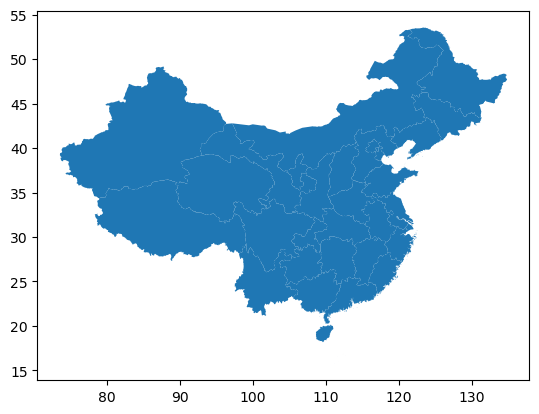

In [154]:
ne_states_provinces_gdf.loc[ne_states_provinces_gdf.iso_a2=='CN'].plot()

In [155]:
chinese_provinces_list = [
"Jilin",
"Heilongjiang",
"Liaoning",
"Qinghai",
"Gansu",
"Shaanxi",
"Shanxi",
"Hebei",
"Sichuan",
"Hubei",
"Henan",
"Shandong",
"Anhui",
"Jiangsu",
"Yunnan",
"Guizhou",
"Hunan",
"Jiangxi",
"Zhejiang",
"Hainan",
"Guangdong",
"Fujian",
"Taiwan"
]

## what is extra that's not in the list of official provinces?

In [156]:
# autonomous regions are:
# Guangxi (southern China)
# Tibet, aka Xizang (southwestern)
# Xinjiang (northwestern)
# Inner Mongolia (northern China)
# also Ningxia (central)

# direct-administered municipalities: Baijing, Chongqing, Tianjin, Shanghai

# Paracel Islands = disputed islands in South China Sea

# Hong Kong, Macau are SARs, not included here

list(set(ne_states_provinces_gdf.loc[ne_states_provinces_gdf.iso_a2=='CN'].name.tolist())-set(chinese_provinces_list))

['Guangxi',
 'Paracel Islands',
 'Chongqing',
 'Xizang',
 'Beijing',
 'Xinjiang',
 'Ningxia',
 'Tianjin',
 'Shanghai',
 'Inner Mongol']

### replace a couple province names

In [157]:
#rename:
#Inner Mongol to Inner Mongolia
#Xizang to Tibet
ne_states_provinces_gdf.loc[ne_states_provinces_gdf.iso_a2=='CN','name'] = \
    ne_states_provinces_gdf.loc[ne_states_provinces_gdf.iso_a2=='CN','name'].replace({'Xizang':'Tibet',
                                                                                      'Inner Mongol':'Inner Mongolia'})

# get combined gdf for CN iso_a2 boundaries

In [158]:
ne_states_provinces_gdf_CN = ne_states_provinces_gdf.loc[ne_states_provinces_gdf.iso_a2=='CN']

# Import and clean pipeline data

In [159]:
gc = pygsheets.authorize(service_account_env_var='GDRIVE_API_CREDENTIALS')
spreadsheet = gc.open_by_key('1foPLE6K-uqFlaYgLPAUxzeXfDO5wOOqE7tibNHeqTek')

gas_pipes = spreadsheet.worksheet('title', 'Gas pipelines').get_as_df(start='A2')
oil_pipes = spreadsheet.worksheet('title', 'Oil/NGL pipelines').get_as_df(start='A2')

# delete columns that aren't the same in the sheets, to concatenate them...
columns_not_in_oil = list(set(gas_pipes.columns)-set(oil_pipes.columns))
columns_not_in_gas = list(set(oil_pipes.columns)-set(gas_pipes.columns))
gas_pipes.drop(columns=columns_not_in_oil, axis=1, inplace=True)
oil_pipes.drop(columns=columns_not_in_gas, axis=1, inplace=True)

country_ratios_df = spreadsheet.worksheet('title', 'Country ratios by pipeline').get_as_df(start='A1')
china_province_ratios_df = spreadsheet.worksheet('title', 'Chinese province ratios by pipeline').get_as_df()

china_province_ratios_df.replace('',numpy.nan,inplace=True)

In [160]:
status_list = ['Proposed', 'Construction', 'Shelved', 'Cancelled', 'Operating', 'Idle', 'Mothballed', 'Retired']
country_list = sorted(list(set(country_ratios_df['Country'])))
region_list = sorted(list(set(country_ratios_df['Region'])))

region_list = sorted(list(set(country_ratios_df['Region'])))
if '#N/A' in region_list:
    region_list.remove('#N/A')

## Specify Oil/NGL or Gas, concatenate if oil_and_gas

In [14]:
#type = 'Oil'
type = 'Gas'
#type = 'Oil_and_Gas'

if type=='Oil':
    pipe_orig_df = oil_pipes
    #pipe.drop(column='CapacityBOEd', inplace=True)
elif type=='Gas':
    pipe_orig_df = gas_pipes
    #pipe.drop('CapacityBcm/y', inplace=True)
elif type=='Oil_and_Gas':  
    pipe_orig_df = pandas.concat([oil_pipes,gas_pipes], axis=0, ignore_index=True)
#reset_index(inplace=True, drop=True)
pipe_orig_df.replace('--', numpy.nan, inplace=True)

In [15]:
# get pipeline list, import as df
pipe_orig_df.PipelineName = pipe_orig_df.PipelineName.str.strip()
pipe_orig_df.SegmentName = pipe_orig_df.SegmentName.str.strip()
pipe_orig_df.ProjectID = pipe_orig_df.ProjectID.str.strip()

# clean up column 'Route'
pipe_orig_df['Route'] = pipe_orig_df['Route'].str.strip()

# get rid of "N/A" and any empty routes (which would be empty rows)
pipe_orig_df = pipe_orig_df.loc[pipe_orig_df['Status']!='N/A']
pipe_orig_df = pipe_orig_df.loc[pipe_orig_df['Wiki']!='']
#pipe_orig = pipe_orig[pipe_orig['Route']!='']

pipes_noroute_df = pipe_orig_df.loc[pipe_orig_df['Route']=='']
pipes_noroute_df = pipes_noroute_df.loc[pipes_noroute_df['Wiki']!=''] # get rid of anything without a wiki page
pipes_withroute_df = pipe_orig_df.loc[pipe_orig_df['Route']!='']
pipes_withroute_df = pipes_withroute_df.loc[pipes_withroute_df.Wiki!='']

In [16]:
def convert_gfit_to_linestring(coord_str, pipeline_name, segment_name, project_id, status, fuel, length):
    '''
    Takes string from GFIT column of coordinates for a single pipeline,
    converts that string into Shapely LineString or MultiLinestring for processing.
    '''
    #print(pipeline_name, segment_name)
    #print(coord_str, pipeline_name, segment_name, project_id, status, fuel, length)

    if ':' in coord_str and ';' not in coord_str:
        # simple geometry; no branching
        # create nested list of lists, separating on colons        
        coord_list = coord_str.split(':')

        coord_list_tuples = []

        # non-branched pipeline (nested list with one level)
        # convert nested list of lists to list of tuples
        for element in coord_list:
            element_tuple = (float(element.split(',')[1]), 
                             float(element.split(',')[0]))
            coord_list_tuples.append(element_tuple)

        pipeline = shapely.geometry.LineString(coord_list_tuples)

    elif ':' in coord_str and ';' in coord_str:
        # create a nested list of lists, separating on semicolons
        coord_list = coord_str.split(';')

        # create a second level of nesting, separating on colons
        coord_list = [x.split(':') for x in coord_list]

        # branched pipeline (nested list with two levels)
        pipeline_ls_all = []

        for nested_list in coord_list:
            coord_list_tuples = []

            for element in nested_list:
                element_tuple = (float(element.split(',')[1]), 
                                 float(element.split(',')[0]))
                coord_list_tuples.append(element_tuple)

            # process coord_list_tuples
            try:
                pipeline_ls = shapely.geometry.LineString(coord_list_tuples)
                pipeline_ls_all.append(pipeline_ls)
            except:
                print(f"Exception for coord_list_tuples: {coord_list_tuples}") # for db
                pass

        pipeline = shapely.geometry.MultiLineString(pipeline_ls_all)

    else:
        # create empty MultiLineString; coordinates were missing or misformatted
        pipeline = shapely.geometry.MultiLineString([])

        print(f'Missing or misformatted coordinates for {pipeline_name} - {segment_name}')

    return pipeline

In [17]:
# this step requires that there be no non-geometry data in the "Route" column, 
# meaning no letters or extraneous symbols (ex: ";;", "::", "--", etc.)
pipes_gdf = geopandas.GeoDataFrame(pipes_withroute_df)

# fix vic transmission system
#pipes_gdf.loc[pipes_gdf.ProjectID=='P1194','Route'] = '-35.66077, 147.01716:-35.67087, 147.01617:-35.69078, 147.01058:-35.69884, 146.99884:-35.70097, 146.98846:-35.72077, 146.95735:-35.73782, 146.95256:-35.7472, 146.93329:-35.75041, 146.92959:-35.75887, 146.92821:-35.77176, 146.91865:-35.77839, 146.90748:-35.77531, 146.87662:-35.79286, 146.84573:-35.82147, 146.81552:-35.82834, 146.79933:-35.83259, 146.76906:-35.85136, 146.76549:-35.85514, 146.7657:-35.85885, 146.76875:-35.86419, 146.76608:-35.87633, 146.75691:-35.87907, 146.75197:-35.88701, 146.74643:-35.90247, 146.73111:-35.91662, 146.71486:-35.92293, 146.70296:-35.93801, 146.69367:-35.95034, 146.69951:-35.96082, 146.69617:-35.99572, 146.69323:-35.99771, 146.69425:-36.00952, 146.69181:-36.01299, 146.68574:-36.02048, 146.68358:-36.040634, 146.685429 ; -36.836227, 144.235821:-36.842877, 144.223573:-36.879324, 144.207059:-36.918315, 144.194714:-36.94951, 144.187966:-37.001388, 144.179528:-37.022759, 144.170877:-37.044701, 144.167158:-37.061993, 144.169809:-37.075676, 144.1657:-37.076938, 144.167313:-37.134915, 144.15191:-37.134979, 144.148976:-37.136941, 144.148008:-37.140757, 144.149727:-37.161917, 144.14575:-37.182111, 144.15075:-37.184991, 144.148725:-37.190719, 144.149715:-37.200437, 144.148614:-37.207378, 144.144867:-37.2201, 144.144892:-37.220952, 144.142543:-37.229993, 144.140775:-37.245019, 144.140776:-37.254516, 144.158234:-37.258433, 144.160326:-37.260487, 144.164812:-37.263151, 144.164882 ; -37.263177, 144.164762:-37.26749, 144.170426:-37.270064, 144.178711:-37.263085, 144.195105:-37.269253, 144.238266:-37.268246, 144.239948:-37.26965, 144.247076:-37.268468, 144.255426:-37.26947, 144.280906:-37.26158, 144.302693:-37.262353, 144.308992:-37.257908, 144.313163:-37.259882, 144.329406:-37.256849, 144.335492:-37.257965, 144.343872:-37.251032, 144.364542:-37.248004, 144.368761:-37.247055, 144.375857:-37.246239, 144.388356:-37.248786, 144.412669:-37.253398, 144.421631 ; -37.884829, 145.070439:-37.899674, 145.06712:-37.899354, 145.064663:-37.910124, 145.061152 ; -37.951556, 145.047352:-37.951486, 145.047509 ; -37.951486, 145.047509:-37.951243, 145.047978 ; -37.910124, 145.061152:-37.938103, 145.055944:-37.94231, 145.052164:-37.951437, 145.051702:-37.951057, 145.048391:-37.951258, 145.047944 ; -37.909871, 145.061271:-37.910124, 145.061152 ; -37.884744, 145.070455:-37.884829, 145.070439 ; -36.041603, 145.950223:-36.055538, 145.995342:-36.055467, 146.014036:-36.063529, 146.049072:-36.067218, 146.085012:-36.067915, 146.134673:-36.074554, 146.190976:-36.077148, 146.20162:-36.080498, 146.259173:-36.087105, 146.332493:-36.086659, 146.423386 ; -36.035987, 145.932037:-36.041603, 145.950223 ; -36.03486, 145.928094:-36.035987, 145.932037 ; -35.849395, 145.562065:-35.882061, 145.560685:-35.898697, 145.597956:-35.926395, 145.598831:-35.940838, 145.610864:-35.94797, 145.622312:-35.951566, 145.622306:-35.951628, 145.632979:-35.955174, 145.641959:-35.955104, 145.686855:-35.959473, 145.692778:-35.980883, 145.7466:-36.001458, 145.822055:-36.003109, 145.82288:-36.018999, 145.871212:-36.03486, 145.928094 ; -36.343803, 145.032708:-36.351895, 145.041295:-36.356879, 145.054775:-36.362561, 145.060824:-36.368856, 145.075404:-36.372246, 145.078532:-36.372248, 145.080756:-36.381431, 145.096634:-36.386508, 145.116436:-36.403747, 145.159181:-36.406036, 145.172608:-36.416059, 145.204397:-36.415389, 145.209134:-36.416613, 145.20959:-36.421747, 145.233086:-36.4245, 145.2894:-36.433404, 145.304018:-36.431757, 145.327253:-36.43533, 145.333563:-36.435967, 145.348534:-36.440897, 145.365191:-36.441043, 145.375848:-36.448558, 145.381604:-36.45142, 145.388338:-36.451861, 145.408206 ; -38.262633, 146.425526:-38.263037, 146.425443 ; -38.254167, 146.427301:-38.262633, 146.425526 ; -38.25416, 146.427311:-38.254167, 146.427301 ; -38.249367, 146.435828:-38.25416, 146.427311 ; -38.15541, 146.511113:-38.165201, 146.509209:-38.18927, 146.48617:-38.200606, 146.47935:-38.203705, 146.463735:-38.236548, 146.45702:-38.245346, 146.442123:-38.249666, 146.441226:-38.249367, 146.435828 ; -38.15536, 146.511123:-38.15541, 146.511113 ; -37.347515, 145.056271:-37.347516, 145.056277 ; -37.332895, 144.983655:-37.335846, 145.014661:-37.334718, 145.022886:-37.336497, 145.031128:-37.347515, 145.056271 ; -37.2536, 144.421606:-37.261997, 144.421109:-37.272508, 144.437181:-37.276102, 144.450668:-37.277139, 144.483091:-37.273836, 144.484891:-37.277149, 144.488222:-37.276641, 144.495458:-37.274696, 144.498338:-37.281513, 144.551797:-37.281266, 144.571001:-37.290846, 144.615073:-37.299309, 144.684194:-37.306613, 144.721593:-37.306918, 144.767369:-37.303566, 144.793805:-37.306275, 144.801615:-37.310822, 144.831297:-37.309835, 144.832006:-37.3137, 144.846459:-37.314573, 144.873895:-37.31959, 144.913565:-37.323854, 144.923164:-37.332895, 144.983655 ; -37.790492, 144.697755:-37.791295, 144.697636 ; -37.790492, 144.697755:-37.755253, 144.703202:-37.753831, 144.706895:-37.718473, 144.712103 ; -36.490551, 146.111972:-36.487914, 146.115105:-36.479205, 146.136806:-36.473986, 146.160954:-36.466394, 146.178008:-36.460016, 146.197943:-36.457094, 146.232215:-36.45397, 146.232205:-36.453013, 146.23844:-36.449936, 146.240488:-36.450855, 146.242608:-36.437076, 146.263705:-36.406451, 146.297273:-36.405861, 146.310049:-36.400376, 146.311141:-36.398828, 146.316391:-36.396266, 146.31727:-36.392318, 146.322915:-36.39336, 146.331681:-36.39014, 146.336039:-36.372818, 146.35105:-36.370653, 146.3562:-36.361691, 146.359944:-36.35565, 146.364796:-36.347202, 146.364313:-36.342627, 146.368123:-36.335346, 146.387426:-36.332536, 146.392698:-36.327555, 146.396404:-36.307316, 146.407816:-36.297448, 146.408973:-36.276447, 146.421227:-36.259816, 146.427384:-36.250916, 146.432666:-36.245951, 146.439133:-36.243621, 146.439027:-36.228603, 146.455071:-36.213617, 146.464626:-36.208706, 146.474464:-36.205192, 146.476955:-36.200008, 146.493095:-36.199996, 146.504164:-36.192727, 146.511605:-36.190139, 146.518571:-36.179595, 146.525813:-36.170188, 146.538705:-36.16542, 146.541598:-36.160145, 146.551478:-36.158768, 146.55112:-36.154794, 146.556632:-36.14452, 146.580984:-36.137584, 146.586205:-36.13816, 146.621095:-36.125686, 146.639786:-36.113842, 146.644696:-36.111961, 146.64885:-36.107927, 146.652116:-36.096154, 146.658248:-36.091533, 146.669064:-36.086838, 146.694924:-36.078685, 146.72262:-36.076415, 146.747159:-36.075088, 146.748008:-36.076951, 146.76188:-36.07563, 146.771052:-36.079183, 146.778761:-36.080357, 146.791814 ; -36.490689, 146.111647:-36.490551, 146.111972 ; -36.726314, 145.545757:-36.721631, 145.555439:-36.708914, 145.569825:-36.69473, 145.595893:-36.69505, 145.597727:-36.674101, 145.632224:-36.672339, 145.640773:-36.644672, 145.671351:-36.633923, 145.703601:-36.627978, 145.706684:-36.620174, 145.71913:-36.619784, 145.724804:-36.616533, 145.72982:-36.610749, 145.747706:-36.600369, 145.771403:-36.599088, 145.77136:-36.596033, 145.785764:-36.583121, 145.814107:-36.572163, 145.847844:-36.56665, 145.854774:-36.555848, 145.874933:-36.547331, 145.899185:-36.537484, 145.920632:-36.536218, 145.920634:-36.527492, 145.937829:-36.524334, 145.951587:-36.524438, 145.964497:-36.519535, 145.97457:-36.516232, 145.992126:-36.515245, 146.015239:-36.516312, 146.026586:-36.514899, 146.03612:-36.516661, 146.037282:-36.508053, 146.069403:-36.490689, 146.111647 ; -37.347515, 145.056271:-37.342531, 145.056453:-37.335522, 145.063011:-37.327553, 145.064529:-37.322962, 145.063236:-37.322962, 145.061399:-37.315525, 145.062926:-37.295748, 145.061295:-37.294322, 145.062674:-37.286857, 145.063132:-37.285756, 145.06459:-37.276061, 145.062388:-37.274016, 145.058563:-37.25624, 145.063325:-37.244853, 145.059668:-37.241523, 145.061723:-37.237071, 145.060347:-37.23544, 145.060618:-37.230579, 145.069206:-37.221455, 145.071495:-37.220083, 145.074105:-37.203272, 145.075802:-37.193182, 145.080063:-37.182061, 145.080064:-37.177273, 145.08244:-37.169387, 145.079554:-37.159679, 145.079229:-37.155716, 145.081999:-37.143794, 145.084583:-37.121441, 145.093689:-37.118112, 145.093521:-37.113301, 145.100389:-37.104846, 145.10586:-37.098759, 145.113173:-37.08372, 145.112506:-37.072704, 145.121697:-37.071007, 145.130726:-37.067353, 145.133934:-37.067385, 145.139714:-37.061224, 145.149935:-37.060407, 145.155218:-37.062508, 145.169878:-37.04185, 145.191951:-37.03551, 145.191545:-37.03124, 145.18682:-37.01902, 145.184838:-37.01171, 145.178945:-36.990817, 145.178582:-36.97653, 145.1762:-36.973371, 145.172267:-36.957335, 145.170899:-36.956762, 145.168139:-36.933787, 145.166392:-36.926321, 145.175616:-36.919288, 145.179429:-36.905444, 145.193422:-36.903437, 145.198645:-36.887314, 145.20984:-36.861468, 145.248883:-36.855693, 145.25512:-36.847745, 145.276901:-36.834356, 145.296993:-36.827421, 145.316379:-36.825621, 145.317191:-36.812469, 145.345631:-36.800654, 145.363031:-36.783117, 145.404627:-36.778461, 145.410347:-36.771029, 145.43251:-36.772154, 145.451053:-36.759033, 145.464539:-36.754751, 145.474084:-36.751301, 145.47769:-36.74596, 145.496683:-36.72968, 145.529859:-36.726314, 145.545757 ; -37.574018, 144.995733:-37.554151, 144.99909:-37.553083, 145.00066:-37.531409, 145.002969:-37.504735, 144.99702:-37.442484, 145.007487:-37.441907, 145.009218:-37.414039, 145.016441:-37.410704, 145.018833:-37.40983, 145.022747:-37.40361, 145.025012:-37.403276, 145.027213:-37.397271, 145.032773:-37.365761, 145.038781:-37.361785, 145.043645:-37.35941, 145.05262:-37.353526, 145.057127:-37.347515, 145.056271 ; -37.577994, 144.995377:-37.59046, 144.993372:-37.597989, 145.000338:-37.619191, 144.995038:-37.627632, 144.994551:-37.633381, 144.991526:-37.65805, 144.987628:-37.660059, 144.988494:-37.670501, 144.985365:-37.679672, 144.985944:-37.679838, 144.984191:-37.685321, 144.98403:-37.688321, 144.981891:-37.68806, 144.97928:-37.692528, 144.978227 ; -37.575007, 144.995546:-37.577994, 144.995377 ; -38.509629, 142.856148:-38.527098, 142.889521:-38.536511, 142.91986:-38.548974, 142.948358:-38.555541, 142.956149 ; -38.508885, 142.852756:-38.509629, 142.856148 ; -38.400033, 142.634131:-38.416766, 142.666656:-38.441052, 142.705878:-38.448171, 142.72007:-38.462602, 142.755929:-38.479938, 142.784684:-38.490912, 142.808382:-38.508885, 142.852756 ; -38.084652, 145.49192:-38.094906, 145.489874 ; -38.088682, 145.491053:-38.084648, 145.491917 ; -37.577994, 144.995377:-37.579276, 145.033411:-37.574925, 145.068866:-37.579174, 145.100045:-37.576482, 145.116869:-37.575673, 145.136596:-37.582523, 145.194239:-37.588611, 145.219801:-37.584486, 145.239464:-37.587162, 145.246488:-37.589423, 145.276231:-37.591959, 145.279722:-37.593501, 145.289806:-37.602113, 145.312261:-37.608571, 145.321446:-37.618634, 145.327478:-37.631714, 145.340831:-37.633341, 145.341966:-37.641743, 145.336247:-37.65143, 145.332189:-37.662146, 145.333359:-37.664702, 145.334947:-37.667848, 145.340653:-37.669284, 145.352364:-37.673807, 145.355483:-37.683373, 145.384824:-37.685135, 145.416733:-37.701256, 145.447205:-37.712366, 145.474567:-37.715558, 145.47709:-37.715685, 145.484419:-37.718741, 145.493275:-37.723814, 145.499319:-37.733602, 145.504989:-37.745912, 145.507705:-37.747879, 145.509863:-37.771444, 145.510842:-37.780291, 145.514907:-37.788128, 145.515792:-37.79811, 145.519882:-37.819269, 145.518037:-37.848042, 145.523682:-37.857227, 145.527222:-37.877002, 145.530097:-37.881827, 145.533842:-37.888223, 145.532561:-37.892648, 145.53472:-37.903859, 145.533551:-37.917659, 145.529019:-37.919797, 145.531228:-37.929772, 145.531883:-37.956765, 145.529305:-37.965357, 145.532138:-37.996178, 145.526254:-37.997019, 145.528188:-38.006051, 145.528555:-38.010187, 145.526281:-38.013209, 145.527027:-38.015796, 145.531085:-38.021295, 145.532121:-38.034102, 145.526505:-38.04792, 145.526546:-38.062187, 145.523051:-38.063376, 145.526163 ; -37.577939, 144.994875:-37.577994, 144.995377 ; -38.279972, 141.583504:-38.282993, 141.576571:-38.287018, 141.573462:-38.301617, 141.571868:-38.303915, 141.573799:-38.321289, 141.570393:-38.321434, 141.580816:-38.330278, 141.587376:-38.362147, 141.586555:-38.379876, 141.605862:-38.381222, 141.632055 ; -37.98111, 145.209393:-37.982205, 145.210971 ; -37.806444, 145.224373:-37.80644, 145.224388 ; -37.78978, 145.308339:-37.789763, 145.308533 ; -37.789763, 145.308533:-37.789288, 145.309997:-37.785063, 145.311004:-37.786102, 145.319519:-37.78133, 145.325846:-37.776987, 145.326601:-37.773394, 145.331894:-37.760754, 145.334027 ; -37.784613, 145.275864:-37.78437, 145.276086 ; -37.808645, 145.21944:-37.808663, 145.219428 ; -37.808656, 145.219421:-37.807584, 145.220662:-37.804628, 145.230285:-37.790301, 145.247263:-37.780537, 145.24926:-37.783644, 145.274179:-37.78525, 145.276973:-37.782465, 145.284271:-37.786798, 145.292566:-37.789763, 145.308533 ; -37.760816, 145.333567:-37.760754, 145.334027 ; -37.760754, 145.334027:-37.760748, 145.334049 ; -38.218902, 147.156332:-38.219634, 147.16234 ; -38.15541, 146.511113:-38.167591, 146.563429:-38.179782, 146.717605:-38.218138, 147.107306:-38.218902, 147.156332 ; -38.149457, 146.47175:-38.151476, 146.477502:-38.15541, 146.511113 ; -38.140358, 146.435455:-38.140158, 146.443714:-38.144226, 146.449505:-38.145876, 146.461549:-38.149457, 146.47175 ; -38.273263, 146.423227:-38.263164, 146.425376 ; -38.193727, 145.907194:-38.194134, 145.915213:-38.203011, 145.928377:-38.209161, 145.933104:-38.212408, 145.941095:-38.214586, 145.952957:-38.213088, 145.963553:-38.217633, 145.987901:-38.216564, 145.994936:-38.218786, 146.013799:-38.216393, 146.039027:-38.212707, 146.051627:-38.214509, 146.066117:-38.213205, 146.085273:-38.215171, 146.120989:-38.214096, 146.128541:-38.216582, 146.146085:-38.21492, 146.155152:-38.216685, 146.169962:-38.20923, 146.183663:-38.209612, 146.189616:-38.205983, 146.195088:-38.206528, 146.206462:-38.201432, 146.212555:-38.199625, 146.219284:-38.201349, 146.224882:-38.20214, 146.243418:-38.200595, 146.263295:-38.208254, 146.275322:-38.209634, 146.280287:-38.212168, 146.281432:-38.215454, 146.293101:-38.219155, 146.295972:-38.226697, 146.292513:-38.232119, 146.286209:-38.236405, 146.289412:-38.23969, 146.288092:-38.245982, 146.291867:-38.247142, 146.294461:-38.25646, 146.297254:-38.258432, 146.305014:-38.268746, 146.313966:-38.276169, 146.315141:-38.283825, 146.320978:-38.291611, 146.329547:-38.295476, 146.336315:-38.295268, 146.34174:-38.299391, 146.351343:-38.302102, 146.371769:-38.305808, 146.376886:-38.308206, 146.389036:-38.302355, 146.400273:-38.286725, 146.403278:-38.27552, 146.422757:-38.273263, 146.423227 ; -38.273984, 146.425261:-38.274133, 146.424699 ; -38.274482, 146.426244:-38.273984, 146.425261 ; -38.273984, 146.425261:-38.273263, 146.423227 ; -38.016948, 145.21028:-38.019605, 145.224164:-38.027182, 145.235429:-38.043738, 145.245806:-38.052246, 145.25441:-38.05749, 145.262977:-38.064658, 145.266223:-38.065573, 145.273839:-38.075119, 145.284785 ; -38.07566, 145.284562:-38.075119, 145.284785 ; -38.075119, 145.284785:-38.082798, 145.34318 ; -38.015967, 145.210335:-38.016948, 145.21028 ; -38.108445, 145.541885:-38.113773, 145.571459:-38.123913, 145.588352:-38.126856, 145.599367:-38.133713, 145.65334:-38.136463, 145.654306:-38.148759, 145.739587:-38.149595, 145.78914:-38.155583, 145.807712:-38.155386, 145.827502:-38.158417, 145.839088:-38.167402, 145.84804:-38.172751, 145.856014:-38.175126, 145.876785:-38.180849, 145.890006:-38.184787, 145.897483:-38.193727, 145.907194 ; -38.082798, 145.34318:-38.090344, 145.421799:-38.087856, 145.439358:-38.087854, 145.457531:-38.089753, 145.471838:-38.094906, 145.489874 ; -38.094906, 145.489874:-38.108445, 145.541885 ; -36.086659, 146.423386:-36.097874, 146.439362:-36.109909, 146.464059:-36.121787, 146.481743:-36.124352, 146.489856:-36.130966, 146.49788:-36.146739, 146.531665:-36.155123, 146.555702 ; -37.995325, 141.9888:-38.022167, 142.007342:-38.03185, 142.020947:-38.059893, 142.019941:-38.068862, 142.021778:-38.104494, 142.021745:-38.12492, 142.023864:-38.154033, 142.018841:-38.178964, 142.006864:-38.205211, 142.002768:-38.239245, 141.993722 ; -37.76654, 141.991471:-37.772503, 141.989349:-37.801255, 141.990986:-37.836614, 141.985145:-37.83729, 141.987317:-37.843469, 141.987678:-37.886287, 141.970884:-37.905801, 141.967851:-37.919965, 141.975829:-37.947018, 141.978087:-37.965313, 141.982572:-37.980736, 141.983382:-37.99188, 141.986422:-37.995325, 141.9888 ; -38.329254, 143.053621:-38.386324, 142.995629:-38.396905, 142.968676:-38.408029, 142.959723:-38.413665, 142.951778:-38.432325, 142.918825:-38.454657, 142.887332:-38.469832, 142.857805:-38.47876, 142.847458:-38.489688, 142.841434:-38.502902, 142.837956 ; -37.987389, 145.208442:-37.98735, 145.211036:-37.984625, 145.211556 ; -37.987383, 145.208431:-37.987384, 145.208443 ; -37.740669, 145.136102:-37.742053, 145.136545:-37.741186, 145.13916:-37.743664, 145.151487:-37.747004, 145.150865:-37.749157, 145.169178:-37.763399, 145.166638:-37.766175, 145.184633:-37.795931, 145.179307:-37.800139, 145.182571:-37.805545, 145.19022:-37.804091, 145.204433:-37.805241, 145.214694:-37.806503, 145.214484:-37.808656, 145.219421 ; -37.910984, 145.236565:-37.977672, 145.222262:-37.976945, 145.2161:-37.980954, 145.215337:-37.981752, 145.211598 ; -37.808656, 145.219421:-37.826208, 145.220385:-37.826456, 145.22481:-37.832531, 145.224829:-37.832853, 145.227431:-37.847503, 145.227284:-37.852666, 145.243718:-37.871544, 145.233097:-37.898826, 145.233086:-37.905082, 145.237726:-37.910984, 145.236565 ; -37.700164, 145.05975:-37.700259, 145.059715 ; -37.710482, 145.083352:-37.736329, 145.117987:-37.740669, 145.136102 ; -37.72583, 145.104388:-37.726093, 145.1047 ; -37.710485, 145.083307:-37.710482, 145.083352 ; -37.710372, 145.08317:-37.710482, 145.083352 ; -37.700164, 145.05975:-37.701088, 145.069248:-37.704502, 145.068955:-37.706238, 145.077246:-37.710372, 145.08317 ; -37.710259, 145.083176:-37.710372, 145.08317 ; -37.692783, 144.990853:-37.69472, 145.011219:-37.69609, 145.022244:-37.694843, 145.023196:-37.700106, 145.043829:-37.698805, 145.04547:-37.700164, 145.05975 ; -37.700073, 145.059782:-37.700164, 145.05975 ; -37.694769, 145.010942:-37.695109, 145.010889 ; -37.692783, 144.990853:-37.693512, 144.99104 ; -37.692565, 144.9786:-37.692783, 144.990853 ; -37.692447, 144.990349:-37.692727, 144.990304 ; -37.791298, 144.697559:-37.791363, 144.697549 ; -37.587093, 144.723057:-37.594847, 144.719093:-37.619175, 144.718443:-37.622454, 144.719164:-37.625407, 144.723851:-37.63419, 144.731838:-37.63684, 144.731684:-37.642844, 144.735026:-37.646354, 144.727783:-37.733432, 144.709034:-37.734416, 144.71:-37.753789, 144.706832:-37.75521, 144.703137:-37.791298, 144.697559 ; -37.823029, 144.825777:-37.823641, 144.827478:-37.816396, 144.851173 ; -37.82293, 144.825147:-37.823029, 144.825777 ; -37.822972, 144.825079:-37.82293, 144.825147 ; -37.816721, 144.817016:-37.822458, 144.822397 ; -37.812269, 144.869277:-37.812613, 144.873406:-37.809777, 144.875361:-37.810687, 144.882985:-37.80576, 144.883933:-37.809536, 144.905281:-37.805738, 144.906863:-37.809181, 144.93576:-37.813696, 144.944382:-37.820676, 144.948051 ; -37.816743, 144.81697:-37.816742, 144.81698 ; -37.816738, 144.816977:-37.816742, 144.81698 ; -37.816742, 144.81698:-37.816723, 144.817011 ; -37.816723, 144.817011:-37.816721, 144.817016 ; -37.810296, 144.817808:-37.816721, 144.817016 ; -37.816721, 144.817016:-37.816718, 144.81702 ; -37.816396, 144.851173:-37.813138, 144.862802 ; -37.813138, 144.862802:-37.812269, 144.869277 ; -37.812084, 144.869382:-37.812269, 144.869277 ; -37.810514, 144.881526:-37.810568, 144.881676 ; -37.808491, 144.818099:-37.81025, 144.817816 ; -37.81025, 144.817816:-37.810296, 144.817808 ; -37.822458, 144.822397:-37.823833, 144.823688:-37.822972, 144.825079 ; -37.808329, 144.818133:-37.808492, 144.818104 ; -36.451855, 145.408541:-36.456427, 145.411732:-36.468487, 145.411151:-36.484539, 145.423625:-36.494364, 145.429162:-36.498688, 145.435074:-36.521011, 145.448413:-36.547576, 145.459463:-36.577744, 145.46761:-36.579059, 145.464883:-36.598892, 145.463002:-36.607458, 145.466767:-36.624267, 145.466857:-36.6318, 145.469452:-36.672563, 145.50248:-36.68286, 145.505831:-36.687596, 145.505836:-36.696264, 145.512536:-36.696299, 145.514186:-36.716515, 145.533619:-36.726314, 145.545757 ; -37.045122, 143.828842:-37.056525, 143.853869:-37.058586, 143.855241:-37.092252, 143.929551:-37.096419, 143.94271:-37.099403, 143.963662:-37.109575, 143.999564:-37.110744, 144.009923:-37.11652, 144.027891:-37.127819, 144.049963:-37.128721, 144.059243:-37.138052, 144.074733:-37.139084, 144.082225:-37.152593, 144.11424:-37.161786, 144.145652 ; -38.57138, 143.028163:-38.57252, 143.034921 ; -38.57252, 143.034921:-38.571066, 143.037117 ; -38.570648, 143.027073:-38.57138, 143.028163 ; -38.563913, 143.004481:-38.563318, 143.014311:-38.570648, 143.027073 ; -38.564236, 142.999121:-38.563913, 143.004481 ; -38.562274, 142.979749:-38.564236, 142.999121 ; -38.556952, 142.959621:-38.561231, 142.96946:-38.562274, 142.979749 ; -38.557737, 142.958267:-38.556952, 142.959621 ; -38.55583, 142.95642:-38.557737, 142.958267 ; -36.079962, 146.786407:-36.08196, 146.801179:-36.092114, 146.810997:-36.101956, 146.825973:-36.106064, 146.84538 ; -36.183203, 144.766905:-36.223631, 144.815741:-36.229572, 144.824436:-36.230194, 144.827836:-36.266728, 144.873741:-36.302775, 144.915061:-36.311664, 144.950007:-36.328648, 144.97749:-36.340673, 145.026615:-36.343803, 145.032284 ; -38.571059, 143.037122:-38.568797, 143.044401:-38.569439, 143.051041:-38.566223, 143.057101:-38.565044, 143.069583:-38.559188, 143.083812:-38.549125, 143.099513:-38.54763, 143.11913:-38.544868, 143.122944:-38.543647, 143.135458:-38.537339, 143.151865:-38.528438, 143.164571:-38.524524, 143.166599:-38.52469, 143.169109:-38.513442, 143.195326:-38.494862, 143.228606:-38.485463, 143.23076:-38.479082, 143.235556:-38.476631, 143.244777:-38.472528, 143.251132:-38.469604, 143.252557:-38.450467, 143.283629:-38.44519, 143.321227:-38.441109, 143.330325:-38.437721, 143.34617:-38.424956, 143.380195:-38.424884, 143.400592:-38.419371, 143.406068:-38.41596, 143.428704:-38.406593, 143.440583:-38.40413, 143.448807:-38.403771, 143.482737:-38.400346, 143.509316:-38.395236, 143.526688:-38.385255, 143.542034:-38.39389, 143.606025:-38.39107, 143.610678:-38.379081, 143.620547:-38.354319, 143.690565:-38.346492, 143.70357:-38.335212, 143.729738:-38.318833, 143.75434:-38.313634, 143.759811:-38.313948, 143.765262:-38.311752, 143.770401:-38.300946, 143.790232:-38.298649, 143.790664:-38.292179, 143.803796:-38.282996, 143.829381:-38.281196, 143.849225:-38.270187, 143.882221:-38.24462, 143.934285:-38.23593, 143.945405:-38.226751, 143.984441:-38.215491, 144.007305:-38.200982, 144.047725:-38.199977, 144.057849:-38.189035, 144.081579:-38.171507, 144.099299:-38.164275, 144.113237:-38.151376, 144.151903:-38.142988, 144.16634:-38.137262, 144.171975:-38.133042, 144.173613:-38.102635, 144.226007:-38.100176, 144.226818:-38.089714, 144.241983:-38.077853, 144.263317:-38.070167, 144.264918:-38.063478, 144.280078:-38.054843, 144.290679:-38.047027, 144.309755:-38.038638, 144.321463:-38.024932, 144.334071:-38.016386, 144.35506:-38.015936, 144.36108:-38.019225, 144.376698:-38.034661, 144.373938:-38.040012, 144.382115:-38.043592, 144.408389 ; -38.218805, 147.15632:-38.219533, 147.162303 ; -38.213955, 147.063229:-38.218044, 147.107313:-38.218805, 147.15632 ; -38.213947, 147.063136:-38.213955, 147.063229 ; -38.018175, 145.214314:-38.024765, 145.269277:-38.027614, 145.276357:-38.040793, 145.344859:-38.057258, 145.465156:-38.06887, 145.572253:-38.076729, 145.60124:-38.080959, 145.624501:-38.087429, 145.752726:-38.104832, 145.901025:-38.103121, 145.906594:-38.106887, 145.934192:-38.105652, 145.967648:-38.12359, 146.161579:-38.134263, 146.343159:-38.132496, 146.372347:-38.136019, 146.388959:-38.140957, 146.437751:-38.140054, 146.443746:-38.144137, 146.449559:-38.145785, 146.461584:-38.151384, 146.477534:-38.154201, 146.505763:-38.167498, 146.563453:-38.179688, 146.71762:-38.213947, 147.063136 ; -37.957393, 145.052393:-37.957394, 145.0524 ; -37.951459, 145.047283:-37.951486, 145.047509 ; -38.014129, 145.210571:-38.014171, 145.210563 ; -38.014113, 145.210507:-38.014129, 145.210571 ; -38.013544, 145.205878:-38.014113, 145.210507 ; -37.992817, 145.163257:-38.000347, 145.161661:-38.003048, 145.181649:-38.011958, 145.190118:-38.013544, 145.205878 ; -37.990665, 145.144019:-37.99307, 145.163117 ; -37.980605, 145.127755:-37.990665, 145.144019 ; -37.990665, 145.144019:-37.990556, 145.144205 ; -37.980605, 145.127755:-37.980615, 145.127768 ; -37.978542, 145.12545:-37.980605, 145.127755 ; -37.980596, 145.127743:-37.980605, 145.127755 ; -37.978542, 145.12545:-37.978583, 145.125493 ; -37.975768, 145.122508:-37.978542, 145.12545 ; -37.975768, 145.122508:-37.976049, 145.122429 ; -37.957374, 145.052071:-37.965735, 145.058055:-37.973369, 145.119964:-37.975768, 145.122508 ; -37.957374, 145.052071:-37.9574, 145.052392 ; -37.951486, 145.047509:-37.957374, 145.052071 ; -38.013561, 145.205875:-38.015814, 145.205436:-38.016948, 145.21028 ; -38.016948, 145.21028:-38.017144, 145.211571 ; -38.013544, 145.205878:-38.013561, 145.205875 ; -38.013471, 145.205892:-38.013544, 145.205878 ; -38.009004, 145.206719:-38.013471, 145.205892 ; -37.981183, 145.209159:-37.988962, 145.205726:-37.99023, 145.208033:-37.998552, 145.207227:-37.998821, 145.208736:-38.009004, 145.206719 ; -37.981115, 145.209385:-37.981183, 145.209159 ; -37.981183, 145.209159:-37.981143, 145.209237 ; -37.981115, 145.209385:-37.980922, 145.209587 ; -37.98111, 145.209393:-37.981115, 145.209385 ; -37.853886, 144.975372:-37.854013, 144.975457:-37.853891, 144.975746 ; -37.853882, 144.97572:-37.853904, 144.975717 ; -37.941921, 145.16615:-37.945082, 145.16966 ; -37.939896, 145.163879:-37.941921, 145.16615 ; -37.939896, 145.163879:-37.940415, 145.163592 ; -37.934591, 145.158006:-37.935214, 145.157718 ; -37.895876, 145.097384:-37.933936, 145.157298 ; -37.923201, 145.140865:-37.92322, 145.140844 ; -37.909616, 145.119244:-37.909683, 145.119403 ; -37.895306, 145.096394:-37.895876, 145.097384 ; -37.895341, 145.096333:-37.895295, 145.096375 ; -37.895295, 145.096375:-37.895306, 145.096394 ; -37.893804, 145.09376:-37.895295, 145.096375 ; -37.894102, 145.093147:-37.893804, 145.09376 ; -37.893801, 145.093752:-37.893804, 145.09376 ; -37.893804, 145.09376:-37.893801, 145.093752 ; -37.893499, 145.092709:-37.893801, 145.093752 ; -37.893053, 145.088927:-37.893499, 145.092709 ; -37.893008, 145.088545:-37.893053, 145.088927 ; -37.862778, 145.01934:-37.867362, 145.030872:-37.87501, 145.039971:-37.876109, 145.045447:-37.877275, 145.046891:-37.88191, 145.050565:-37.882763, 145.052068:-37.884744, 145.071929:-37.893008, 145.088545 ; -37.877873, 145.045582:-37.877933, 145.047398 ; -37.866767, 145.031327:-37.867577, 145.031135 ; -37.862778, 145.01934:-37.863583, 145.01919 ; -37.853761, 144.976038:-37.855413, 144.997904:-37.857248, 144.997579:-37.85856, 144.997326:-37.860945, 145.015159:-37.862778, 145.01934 ; -37.862734, 145.019239:-37.862778, 145.01934 ; -37.856229, 144.996575:-37.856384, 144.997732 ; -37.856228, 144.996571:-37.856229, 144.996575 ; -37.853891, 144.975746:-37.853761, 144.976038 ; -37.841183, 144.96174:-37.844752, 144.964252:-37.853761, 144.976038 ; -37.846688, 144.96717:-37.846595, 144.967302 ; -37.840763, 144.961311:-37.841183, 144.96174 ; -37.836081, 144.959112:-37.840763, 144.961311 ; -37.837883, 144.959429:-37.837752, 144.959876 ; -37.830136, 144.956383:-37.835842, 144.958998 ; -37.822447, 144.955526:-37.826642, 144.957508:-37.828321, 144.955533:-37.830136, 144.956383 ; -37.822447, 144.955526:-37.822445, 144.955535 ; -37.822266, 144.956048:-37.82229, 144.956106:-37.822291, 144.956059 ; -37.984714, 145.212374:-37.990014, 145.212925 ; -37.933936, 145.157298:-37.939896, 145.163879 ; -37.92322, 145.140844:-37.923332, 145.14094 ; -37.856229, 144.996575:-37.856242, 144.996569 ; -37.835842, 144.958998:-37.836029, 144.959056 ; -37.822289, 144.956069:-37.822447, 144.955526 ; -38.014042, 145.210504:-38.014201, 145.210811 ; -38.013471, 145.205892:-38.014042, 145.210504 ; -38.009004, 145.206719:-38.013471, 145.205892 ; -37.990014, 145.212925:-37.991381, 145.210232:-38.009004, 145.206719 ; -37.984625, 145.211556:-37.984714, 145.212374 ; -37.984476, 145.211456:-37.984625, 145.211556 ; -37.955868, 145.181722:-37.982829, 145.211769:-37.984476, 145.211456 ; -37.945082, 145.16966:-37.955868, 145.181722 ; -37.80028, 144.787769:-37.802271, 144.801773:-37.804902, 144.801472:-37.805369, 144.806502:-37.809342, 144.806714:-37.810295, 144.817802 ; -37.798017, 144.757756:-37.796712, 144.75793:-37.799155, 144.787913:-37.80028, 144.787769 ; -37.767737, 144.56366:-37.767347, 144.563664 ; -37.712788, 144.426281:-37.713998, 144.424277 ; -37.784089, 144.634324:-37.796169, 144.75149:-37.798017, 144.757756 ; -37.594066, 144.183257:-37.604262, 144.208088:-37.608152, 144.223095:-37.610041, 144.240585:-37.620801, 144.256339:-37.63426, 144.271458:-37.646079, 144.291401:-37.654208, 144.316283:-37.659416, 144.319992:-37.665296, 144.320876:-37.671422, 144.329662:-37.671291, 144.337837:-37.689069, 144.365871:-37.693625, 144.379066:-37.709232, 144.391855:-37.711766, 144.401174:-37.71403, 144.424501:-37.71966, 144.430436:-37.720771, 144.440264:-37.745581, 144.494948:-37.761398, 144.551157:-37.779024, 144.585396:-37.784089, 144.634324 ; -37.810296, 144.817808:-37.8163, 144.817138:-37.82228, 144.822758:-37.8191, 144.830136 ; -37.810295, 144.817802:-37.810296, 144.817808 ; -36.836058, 144.235922:-36.842813, 144.223471:-36.879832, 144.206776:-36.91872, 144.194461:-37.001367, 144.179414:-37.022735, 144.170763:-37.044702, 144.167038:-37.061992, 144.169689:-37.075704, 144.165566:-37.07697, 144.167183:-37.134821, 144.151803:-37.134885, 144.14889:-37.136938, 144.147879:-37.140766, 144.149601:-37.161954, 144.145622:-37.182092, 144.150626:-37.184965, 144.148604:-37.190719, 144.149594:-37.200399, 144.1485:-37.207361, 144.144747:-37.220037, 144.144772:-37.220885, 144.142433:-37.229985, 144.140655:-37.245063, 144.140655:-37.254574, 144.158134:-37.2585, 144.160232:-37.260544, 144.164694:-37.263177, 144.164762 ; -37.263177, 144.164762:-37.279105, 144.166246:-37.297809, 144.170684:-37.304588, 144.166856:-37.338134, 144.166612:-37.3415, 144.163014:-37.367895, 144.158168:-37.377591, 144.15243:-37.381894, 144.144204:-37.39498, 144.131736:-37.403691, 144.130307:-37.417177, 144.125421:-37.418586, 144.127613:-37.430691, 144.125758:-37.443351, 144.135811:-37.444949, 144.135189:-37.445873, 144.137851:-37.458416, 144.147962:-37.469983, 144.154269:-37.483162, 144.155599:-37.48395, 144.151762:-37.500911, 144.15427:-37.518685, 144.163161:-37.526561, 144.162827:-37.558676, 144.173679:-37.562764, 144.176932:-37.579011, 144.179925:-37.58436, 144.182588:-37.588218, 144.181916:-37.58849, 144.184262:-37.594066, 144.183257 ; -37.822458, 144.822397:-37.818948, 144.830963 ; -38.040544, 144.416113:-38.039797, 144.415712 ; -38.040544, 144.416113:-38.034506, 144.431589:-38.016088, 144.466584:-37.994046, 144.514178:-37.99269, 144.514425:-37.969075, 144.558839:-37.968777, 144.563145:-37.966731, 144.562795:-37.930885, 144.628359:-37.907178, 144.692994:-37.898078, 144.706267:-37.889864, 144.709249:-37.878763, 144.706212:-37.874161, 144.71043:-37.855745, 144.743923:-37.843869, 144.761087:-37.836228, 144.767677:-37.835215, 144.788596:-37.831133, 144.794328:-37.82246, 144.822392 ; -38.066426, 144.382754:-38.066898, 144.384038:-38.060061, 144.388133:-38.058196, 144.390388:-38.058459, 144.39266:-38.042155, 144.410329:-38.040544, 144.416113 ; -37.82246, 144.822392:-37.822458, 144.822397 ; -37.798017, 144.757756:-37.80028, 144.787769 ; -37.80028, 144.787769:-37.802234, 144.801826:-37.804866, 144.801534:-37.805355, 144.806836:-37.809259, 144.806758:-37.81025, 144.81781 ; -37.81025, 144.817816:-37.816273, 144.817882:-37.816486, 144.82047:-37.820897, 144.825025:-37.819222, 144.829484 ; -37.81025, 144.81781:-37.81025, 144.817816 ; -37.791298, 144.697559:-37.796082, 144.751442:-37.798017, 144.757756 ; -37.784089, 144.634324:-37.791298, 144.697559 ; -38.043277, 144.408869:-38.035243, 144.421403:-38.022861, 144.448216:-38.02337, 144.453895:-38.016027, 144.466545:-37.994, 144.514116:-37.992657, 144.514356:-37.970916, 144.555627:-37.969919, 144.554782:-37.869236, 144.573385:-37.865213, 144.570877:-37.859534, 144.57151:-37.855203, 144.578508:-37.855092, 144.581226:-37.837245, 144.603284:-37.832185, 144.605213:-37.824873, 144.618266:-37.818881, 144.619603:-37.803717, 144.631056:-37.784089, 144.634324 ; -38.063736, 145.526599:-38.068957, 145.572185:-38.076821, 145.601208:-38.081038, 145.624256:-38.086503, 145.736035 ; -38.367815, 142.605771:-38.38711, 142.631938:-38.39975, 142.634219 ; -38.367396, 142.602875:-38.367815, 142.605771 ; -38.28161, 142.495933:-38.282744, 142.499665:-38.292055, 142.511693:-38.298303, 142.525395:-38.335201, 142.565483:-38.339841, 142.572304:-38.349854, 142.579313:-38.367396, 142.602875 ; -38.28006, 141.584024:-38.272111, 141.615374:-38.268957, 141.637904:-38.26709, 141.640086:-38.255882, 141.67784:-38.247832, 141.69876:-38.247495, 141.710432:-38.229635, 141.749058:-38.223947, 141.769157:-38.227099, 141.813619:-38.226435, 141.832487:-38.232139, 141.86975:-38.23593, 141.915708:-38.24069, 142.012846:-38.24174, 142.105539:-38.245063, 142.156325:-38.251146, 142.191079:-38.250811, 142.22556:-38.25516, 142.314763:-38.267344, 142.441995:-38.278667, 142.475818:-38.28161, 142.495933 ; -37.587063, 144.108345:-37.590057, 144.114646:-37.596297, 144.156355:-37.594066, 144.183257 ; -37.586166, 144.10128:-37.587063, 144.108345 ; -37.567953, 143.932874:-37.569848, 143.992585:-37.572349, 143.999005:-37.576722, 144.061427:-37.580061, 144.069187:-37.582026, 144.08531:-37.583714, 144.087835:-37.586166, 144.10128 ; -36.040634, 146.685429:-36.088736, 146.678336'

pipes_gdf['geometry'] = numpy.nan
for row in pipes_gdf.index:
    #if pipes_gdf.iloc[row-1]['ProjectID'] in ['P4667']:
    #    pass
    linestring = convert_gfit_to_linestring(
        str(pipes_gdf.at[row, 'Route']), 
        pipes_gdf.at[row, 'PipelineName'], 
        pipes_gdf.at[row, 'SegmentName'], 
        pipes_gdf.at[row, 'ProjectID'], 
        pipes_gdf.at[row, 'Status'], 
        pipes_gdf.at[row, 'Fuel'], 
        pipes_gdf.at[row, 'LengthMergedKm'])
    pipes_gdf.at[row, 'geometry'] = linestring

/var/folders/fl/t07mc8053p33mn6mdmvp45580000gn/T/ipykernel_4014/972092054.py:8: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  pipes_gdf['geometry'] = numpy.nan


# import GOGET data

In [18]:
gc = pygsheets.authorize(service_account_env_var='GDRIVE_API_CREDENTIALS')
spreadsheet = gc.open_by_key('13FLhSyuLlsA43rZYGQuVKHh9heciQiB641l62xBzkBU')

goget_orig_df = spreadsheet.worksheet('title', 'Main data').get_as_df()
goget_rp_orig_df = spreadsheet.worksheet('title', 'Reserves and Production').get_as_df()

In [19]:
goget_orig_df.assign(ColName='geometry')
goget_orig_df = goget_orig_df.loc[(goget_orig_df.Longitude!='')&
                                (goget_orig_df.Latitude!='')]
goget_orig_df['geometry'] = goget_orig_df[['Longitude','Latitude']].apply(shapely.geometry.Point, axis=1)
goget_gdf = geopandas.GeoDataFrame(goget_orig_df, geometry=goget_orig_df['geometry'])

# import gas plants data

In [21]:
gogpt_orig_df = pandas.read_excel('../data/Global-Oil-and-Gas-Plant-Tracker-GOGPT-August-2023.xlsx',
                 sheet_name='Oil & Gas Units')

In [22]:
gogpt_orig_df.replace('not found',numpy.nan,inplace=True)
gogpt_orig_df.replace('',numpy.nan,inplace=True)

In [161]:
gogpt_orig_df.assign(ColName='geometry')
gogpt_orig_df['geometry'] = gogpt_orig_df[['Longitude','Latitude']].apply(shapely.geometry.Point, axis=1)
gogpt_gdf = geopandas.GeoDataFrame(gogpt_orig_df, geometry=gogpt_orig_df['geometry'])

# import terminals data

In [163]:
spreadsheet = gc.open_by_key('1tcS6Wd-Wp-LTDpLzFgJY_RSNDnbyubW3J_9HKIAys4A')
terms_df_orig = spreadsheet.worksheet('title', 'Terminals').get_as_df(start='A3')

# remove oil export terminals
terms_df_orig = terms_df_orig.loc[terms_df_orig['Fuel']=='LNG']
# remove anything without a wiki page
terms_df_orig = terms_df_orig.loc[terms_df_orig['Wiki']!='']
# remove anything without a ComboID
terms_df_orig = terms_df_orig.loc[terms_df_orig['ComboID']!='']

In [164]:
no_lonlat_options = [
    'Unknown',
    'TBD',
    #''
]

In [165]:
# code to create a dataframe with WKT formatted geometry

# (1) copy, clean up
to_convert_df = terms_df_orig.copy()
to_convert_df = to_convert_df.loc[~(to_convert_df['Latitude'].isin(no_lonlat_options)) |
                             ~(to_convert_df['Longitude'].isin(no_lonlat_options))]

# (2) convert all terminals
terms_df_converted = to_convert_df.copy()
terms_df_converted.assign(ColName='geometry')
terms_df_converted['geometry'] = to_convert_df[['Longitude','Latitude']].apply(shapely.geometry.Point, axis=1)
terms_df_converted = terms_df_converted.reset_index(drop=True)

# # (3) store in a GeoDataFrame, attach a projection, transform to a different one
terms_gdf = geopandas.GeoDataFrame(terms_df_converted, geometry=terms_df_converted['geometry'])
terms_gdf = terms_gdf.set_crs('epsg:4326')
#terms_gdf_4087 = terms_df_gdf.to_crs('epsg:4087')

# maps of pipelines, plants

## fig 3 - china map

Text(0.0, -0.10588235294117647, 'Source: Global Gas Infrastructure Tracker,\nGlobal Oil and Gas Plant Tracker,\nGlobal Oil and Gas Extraction Tracker')

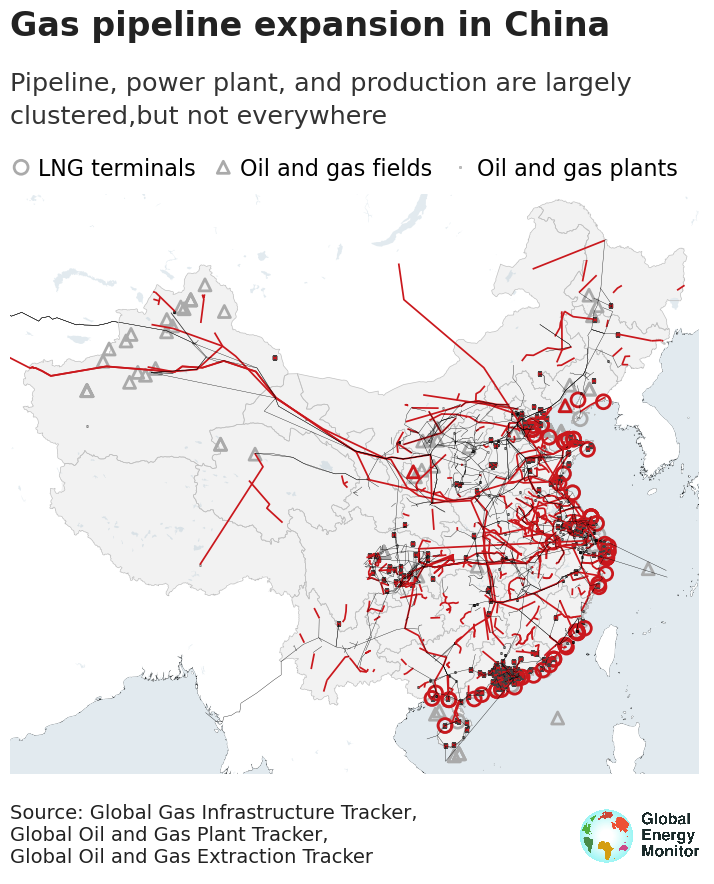

In [166]:
map_proj = cartopy.crs.AlbersEqualArea(central_longitude=105,
                                       central_latitude=35,
                                       false_easting=0,
                                       false_northing=0,
                                       standard_parallels=[27,45])
data_proj = cartopy.crs.PlateCarree()

width_pixels = 640 # 640 default
height_pixels = 850 # 450 default
fig = mp.figure(figsize=(width_pixels/72, height_pixels/72))
fig.canvas.draw()

ax = fig.add_subplot(111, projection=map_proj)

ax.coastlines(resolution='10m', edgecolor='0.5', linewidth=0.25)

ax.set_extent([80,126,16.5,53], crs=data_proj)
highlight_land = ax.add_geometries(countries_gdf.loc[countries_gdf.SOVEREIGNT=='China']['geometry'], 
                                   facecolor=highlight_land_color, 
                                   edgecolor='None', crs=data_proj, 
                                   alpha=highlight_land_alpha)

other_land = ax.add_geometries(countries_gdf.loc[countries_gdf.SOVEREIGNT!='China']['geometry'], 
                               facecolor=other_land_color, 
                               edgecolor='None', 
                               crs=data_proj, 
                               alpha=other_land_alpha)

lakes = ax.add_geometries(lakes_gdf['geometry'], 
                          facecolor=water_color, 
                          edgecolor='None', 
                          crs=data_proj, 
                          alpha=water_alpha)

oceans = ax.add_geometries(oceans_gdf['geometry'], 
                           facecolor=water_color, 
                           edgecolor='None', 
                           crs=data_proj, 
                           alpha=water_alpha)

ax.add_geometries(ne_states_provinces_gdf.loc[ne_states_provinces_gdf.iso_a2=='CN'].geometry,
                  crs=data_proj,
                  facecolor='None',
                  edgecolor='0.75',
                  linewidth=0.5)

# PIPELINES
ax.add_geometries(pipes_gdf.loc[(pipes_gdf.Status.isin(['Construction','Proposed']))&
                                (pipes_gdf.Countries.str.contains('China'))]['geometry'], 
                  crs=data_proj, 
                  facecolor='None', 
                  edgecolor=construction_color, 
                  linewidth=construction_lw, zorder=5)

ax.add_geometries(pipes_gdf.loc[(pipes_gdf.Status.isin(['Operating']))&
                                (pipes_gdf.Countries.str.contains('China'))]['geometry'], 
                  crs=data_proj, 
                  facecolor='None', 
                  edgecolor=operating_color,
                  linewidth=operating_lw, zorder=5)

# TERMINALS
points_list = terms_gdf.loc[(terms_gdf.Status.isin(['Operating']))&
                            (terms_gdf.Country.isin(['China','Macao','Hong Kong']))]['geometry'].tolist()
ax.scatter([point.x for point in points_list], 
           [point.y for point in points_list],
           transform=data_proj, 
           facecolor='None', 
           edgecolor=goget_color, 
           linewidth=2,
           zorder=3, marker='o',
           s=100, label='LNG terminals')

points_list = terms_gdf.loc[(terms_gdf.Status.isin(['Proposed','Construction']))&
                            (terms_gdf.Country.isin(['China','Macao','Hong Kong']))]['geometry'].tolist()
ax.scatter([point.x for point in points_list], 
           [point.y for point in points_list],
           transform=data_proj, 
           facecolor='None', 
           edgecolor=construction_color, 
           linewidth=2,
           zorder=3, marker='o',
           s=100)

# GOGET
points_list = goget_gdf.loc[(~goget_gdf.Status.isin(['exploration', 'in development', 'discovered']))&
                            (goget_gdf.Country.isin(['China','Macao','Hong Kong']))]['geometry'].tolist()
ax.scatter([point.x for point in points_list], 
           [point.y for point in points_list],
           transform=data_proj, 
           facecolor='None', 
           edgecolor=goget_color, 
           linewidth=2,
           zorder=2, alpha=1,
           marker='^',
           s=75, label='Oil and gas fields')

points_list = goget_gdf.loc[(goget_gdf.Status.isin(['exploration', 'in development', 'discovered']))&
                            (goget_gdf.Country.isin(['China','Macao','Hong Kong']))]['geometry'].tolist()
ax.scatter([point.x for point in points_list], 
           [point.y for point in points_list],
           transform=data_proj, 
           facecolor='None', 
           edgecolor=construction_color, 
           linewidth=2,
           zorder=2, alpha=1,
           marker='^',
           s=75)

# GOGPT
points_list = gogpt_gdf.loc[(~gogpt_gdf.Status.isin(['announced','pre-construction','construction']))&
                            (gogpt_gdf.Country.isin(['China','Macao','Hong Kong']))]['geometry'].tolist()
ax.scatter([point.x for point in points_list], 
           [point.y for point in points_list],
           transform=data_proj, 
           facecolor=operating_color, 
           edgecolor=operating_color, 
           linewidth=0.5,
           zorder=4,
           s=4, marker='s',
           alpha=0.25, label='Oil and gas plants')

points_list = gogpt_gdf.loc[(gogpt_gdf.Status.isin(['announced','pre-construction','construction']))&
                            (gogpt_gdf.Country.isin(['China','Macao','Hong Kong']))]['geometry'].tolist()
ax.scatter([point.x for point in points_list], 
           [point.y for point in points_list],
           transform=data_proj, 
           facecolor=construction_color,
           edgecolor='0.25', 
           linewidth=0.25,
           zorder=4, marker='s',
           s=5)

#fig.tight_layout()

# turn off outline
ax.axis('off')

bbox = ax.get_tightbbox(renderer=fig.canvas.renderer)
x_location,y_location = ax.transAxes.inverted().transform([bbox.x0, bbox.y1])
legend = ax.legend(fontsize=base_size,
          frameon=False,
          loc='lower left',
          bbox_to_anchor=(x_location,1.025),
          bbox_transform=ax.transAxes,
          handlelength=1,
          handleheight=1,
          ncols=4,
          borderpad=0,
          borderaxespad=0,
          columnspacing=0.75,
          handletextpad=0.25)

# add titles, first get the location of the yaxis labels so they can line up exactly
# call it "x_location"
bbox = ax.get_tightbbox(renderer=fig.canvas.renderer)
x_location,y_location = ax.transAxes.inverted().transform([bbox.x0, bbox.y1])
ax.text(s='Pipeline, power plant, and production are largely\nclustered,but not everywhere',
        size=base_size*1.15,
        color=color_subtitle,
        x=x_location,
        y=y_location+0.05,
        ha='left',
        va='bottom',
        weight=text_weight_normal,
        transform=ax.transAxes,
        linespacing=1.45,
        wrap=True)

bbox_with_subtitle = ax.get_tightbbox(renderer=fig.canvas.renderer)
x_location_subtitle,y_location_subtitle = ax.transAxes.inverted().transform([bbox_with_subtitle.x0, bbox_with_subtitle.y1])
ax.text(s='Gas pipeline expansion in China',
        size=base_size*1.5,
        color=color_title,
        x=x_location,
        y=y_location_subtitle+0.05,
        ha='left',
        va='bottom',
        weight=text_weight_bold,
        transform=ax.transAxes,
        linespacing=1.35,
        wrap=False)

# CAPTION AND GEM LOGO
gem_logo = matplotlib.image.imread('/Users/baird/Dropbox/_git_ALL/_github-repos-gem/gemplot-python/data/gem_logo_padding.png')
logo_image_box = matplotlib.offsetbox.OffsetImage(gem_logo, zoom=0.035)
logo_annotation_box = matplotlib.offsetbox.AnnotationBbox(logo_image_box,
                                                          (1,0), # sets box alignment to lower right corder
                                                          xycoords='axes fraction',
                                                          box_alignment=(1.,1.5), 
                                                          frameon=False)
ax.add_artist(logo_annotation_box)

# note at bottom
ax.text(s='Source: Global Gas Infrastructure Tracker,\nGlobal Oil and Gas Plant Tracker,\n'+
            'Global Oil and Gas Extraction Tracker',
        size=base_size*0.875,
        color=color_title,
        x=x_location,
        y=-0.2*450/height_pixels,
        ha='left',
        va='center',
        weight=text_weight_normal,
        transform=ax.transAxes,
        linespacing=1.2,
        wrap=False)

# fig.savefig('../figures/Figure2-China-pipelines-plants.png', 
#             dpi=600,
#             bbox_inches='tight',
#             transparent=False)

## fig 4 - russia map

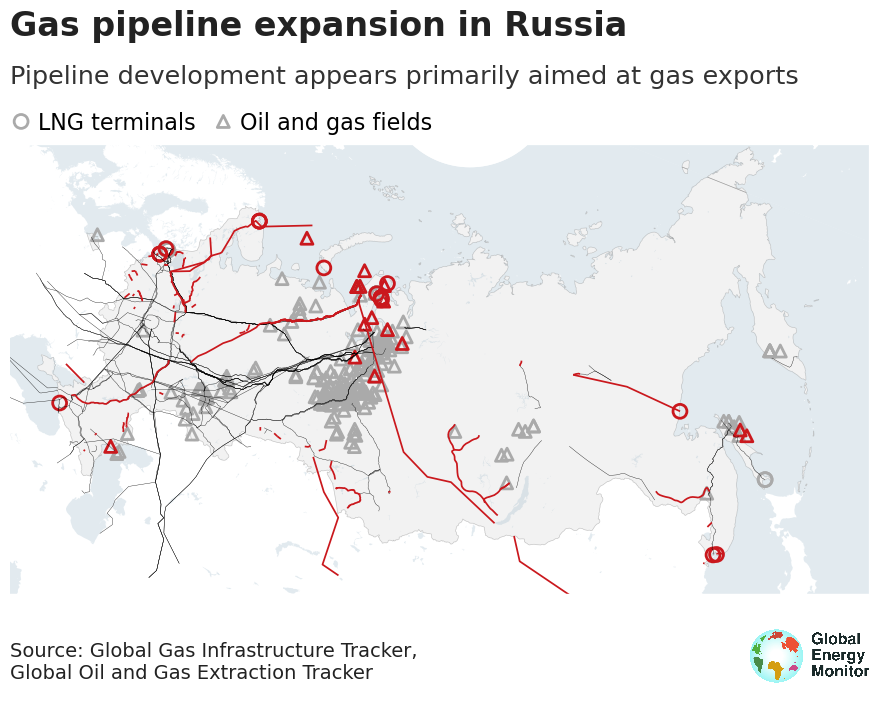

In [145]:
map_proj = cartopy.crs.AlbersEqualArea(central_longitude=100,
                                       central_latitude=56,
                                       false_easting=0,
                                       false_northing=0,
                                       standard_parallels=[50,70])
data_proj = cartopy.crs.PlateCarree()

width_pixels = 640 # 640 default
height_pixels = 450 # 450 default
fig = mp.figure(figsize=(width_pixels/72, height_pixels/72))
fig.canvas.draw()

ax = fig.add_subplot(111, projection=map_proj)
ax.set_extent([25,160,45,80], crs=data_proj)

# LAND, LAKES, OCEAN
other_land = ax.add_geometries(countries_gdf.loc[countries_gdf.SOVEREIGNT!='Russia']['geometry'], 
                               facecolor=other_land_color, 
                               edgecolor='None', 
                               crs=data_proj, 
                               alpha=other_land_alpha)

highlight_land = ax.add_geometries(countries_gdf.loc[countries_gdf.SOVEREIGNT=='Russia']['geometry'], 
                                   facecolor=highlight_land_color, 
                                   edgecolor='0', 
                                   linewidth=0.5,
                                   crs=data_proj, alpha=highlight_land_alpha)

lakes = ax.add_geometries(lakes_gdf['geometry'], 
                          facecolor=water_color, 
                          edgecolor='None', 
                          crs=data_proj, 
                          alpha=water_alpha)

oceans = ax.add_geometries(oceans_gdf['geometry'], 
                           facecolor=water_color, 
                           edgecolor='None', 
                           crs=data_proj, 
                           alpha=water_alpha)

# PIPELINES
ax.add_geometries(pipes_gdf.loc[(pipes_gdf.Status.isin(['Operating']))&
                            (pipes_gdf.Countries.str.contains('Russia'))]['geometry'], 
                  crs=data_proj, 
                  facecolor='None', 
                  edgecolor=operating_color, 
                  linewidth=operating_lw, zorder=5)

ax.add_geometries(pipes_gdf.loc[(pipes_gdf.Status.isin(['Proposed','Construction']))&
                            (pipes_gdf.Countries.str.contains('Russia'))]['geometry'], 
                  crs=data_proj, 
                  facecolor='None', 
                  edgecolor=construction_color,
                  linewidth=construction_lw, zorder=5,
                  label='Gas pipelines')

# TERMINALS
points_list = terms_gdf.loc[(terms_gdf.Status.isin(['Operating']))&
                            (terms_gdf.Country.isin(['Russia']))]['geometry'].tolist()
ax.scatter([point.x for point in points_list], 
           [point.y for point in points_list],
           transform=data_proj, 
           facecolor='None', 
           edgecolor=goget_color, 
           linewidth=2,
           zorder=3, marker='o',
           s=100, label='LNG terminals')

points_list = terms_gdf.loc[(terms_gdf.Status.isin(['Proposed','Construction']))&
                            (terms_gdf.Country.isin(['Russia']))]['geometry'].tolist()
ax.scatter([point.x for point in points_list], 
           [point.y for point in points_list],
           transform=data_proj, 
           facecolor='None', 
           edgecolor=construction_color, 
           linewidth=2,
           zorder=3, marker='o',
           s=100)

# GOGET
points_list = goget_gdf.loc[(~goget_gdf.Status.isin(['exploration', 'in development', 'discovered']))&
                            (goget_gdf.Country.isin(['Russia']))]['geometry'].tolist()
ax.scatter([point.x for point in points_list], 
           [point.y for point in points_list],
           transform=data_proj, 
           facecolor='None', 
           edgecolor=goget_color, 
           linewidth=2,
           zorder=2, alpha=1,
           marker='^',
           s=75, label='Oil and gas fields')

points_list = goget_gdf.loc[(goget_gdf.Status.isin(['exploration', 'in development', 'discovered']))&
                            (goget_gdf.Country.isin(['Russia']))]['geometry'].tolist()
ax.scatter([point.x for point in points_list], 
           [point.y for point in points_list],
           transform=data_proj, 
           facecolor='None', 
           edgecolor=construction_color, 
           linewidth=2,
           zorder=2, alpha=1,
           marker='^',
           s=75)

fig.tight_layout()

# turn off outline
#ax.outline_patch.set_visible(False)
ax.axis('off')

# add titles, first get the location of the yaxis labels so they can line up exactly
# call it "x_location"
bbox = ax.get_tightbbox(renderer=fig.canvas.renderer)
x_location,y_location = ax.transAxes.inverted().transform([bbox.x0, bbox.y1])
legend = ax.legend(fontsize=base_size,
          frameon=False,
          loc='lower left',
          bbox_to_anchor=(x_location,1.025),
          bbox_transform=ax.transAxes,
          handlelength=1,
          handleheight=1,
          ncols=4,
          borderpad=0,
          borderaxespad=0,
          columnspacing=0.75,
          handletextpad=0.25)

# now get tight bbox again for further placement AFTER legend is added
bbox = legend.get_tightbbox(renderer=fig.canvas.renderer)
x_location,y_location = ax.transAxes.inverted().transform([bbox.x0, bbox.y1])
ax.text(s='Pipeline development appears primarily aimed at gas exports',
        size=base_size*1.15,
        color=color_subtitle,
        x=x_location,
        y=y_location+0.05,
        ha='left',
        va='bottom',
        weight=text_weight_normal,
        transform=ax.transAxes,
        linespacing=1.45,
        wrap=True)

bbox_with_subtitle = ax.get_tightbbox(renderer=fig.canvas.renderer)
x_location_subtitle,y_location_subtitle = ax.transAxes.inverted().transform([bbox_with_subtitle.x0, bbox_with_subtitle.y1])
ax.text(s='Gas pipeline expansion in Russia',
        size=base_size*1.5,
        color=color_title,
        x=x_location,
        y=y_location_subtitle+0.05,#1.2,
        ha='left',
        va='bottom',
        weight=text_weight_bold,
        transform=ax.transAxes,
        linespacing=1.35,
        wrap=False)

# GEM LOGO AND NOTES
gem_logo = matplotlib.image.imread('/Users/baird/Dropbox/_git_ALL/_github-repos-gem/gemplot-python/data/gem_logo_padding.png')
logo_image_box = matplotlib.offsetbox.OffsetImage(gem_logo, zoom=0.035)
logo_annotation_box = matplotlib.offsetbox.AnnotationBbox(logo_image_box,
                                                          (1,0), # sets box alignment to lower right corder
                                                          xycoords='axes fraction',
                                                          box_alignment=(1.,1.5), 
                                                          frameon=False)
ax.add_artist(logo_annotation_box)

# note at bottom
ax.text(s='Source: Global Gas Infrastructure Tracker,\n'+
            'Global Oil and Gas Extraction Tracker',
        size=base_size*0.875,
        color=color_title,
        x=x_location,
        y=-0.15*450/height_pixels,
        ha='left',
        va='center',
        weight=text_weight_normal,
        transform=ax.transAxes,
        linespacing=1.2,
        wrap=False)

fig.savefig('../figures/Figure3-Russia-pipelines-LNG-terminals-map.png', 
            dpi=600,
            bbox_inches='tight',
            transparent=False)

## fig 5 - india, pakistan, iran

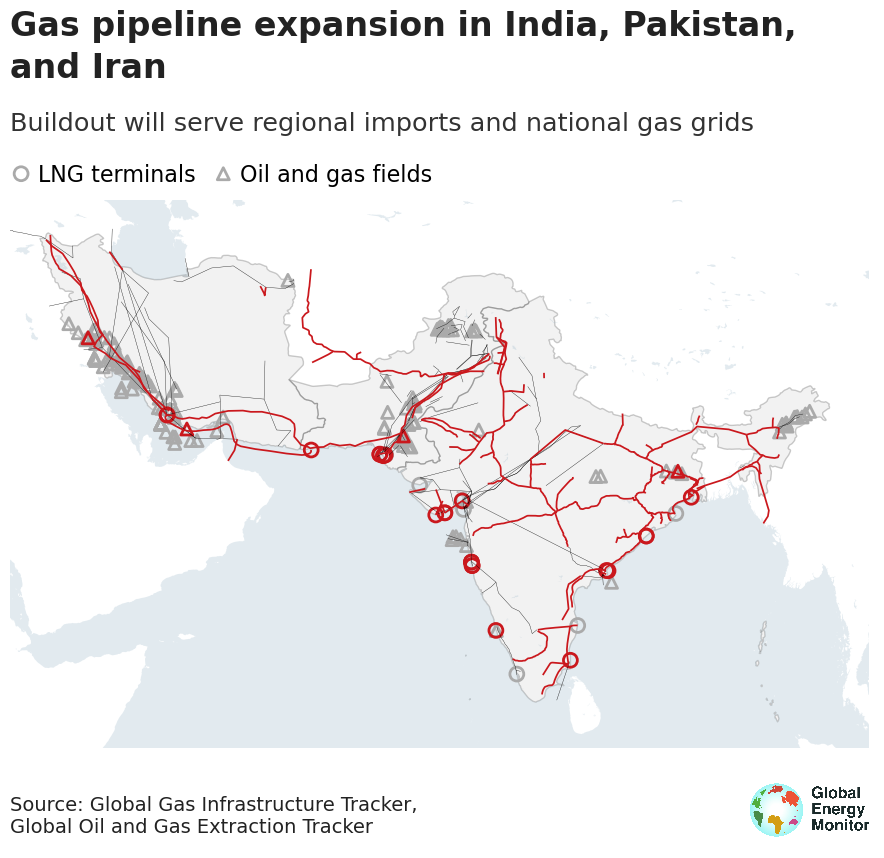

In [106]:
map_proj = cartopy.crs.PlateCarree()#Robinson(central_longitude=11.5)
data_proj = cartopy.crs.PlateCarree()

width_pixels = 640 # 640 default
height_pixels = 450 # 450 default
fig = mp.figure(figsize=(width_pixels/72, height_pixels/72))
fig.canvas.draw()

ax = fig.add_subplot(111, projection=map_proj)
ax.set_extent([42,100,5,42], crs=map_proj)

other_land = ax.add_geometries(countries_gdf.loc[~countries_gdf.SOVEREIGNT.isin(['India','Pakistan','Iran'])]['geometry'], 
                               facecolor=other_land_color, 
                               edgecolor='None', 
                               crs=data_proj, 
                               alpha=other_land_alpha)

highlight_land = ax.add_geometries(countries_gdf.loc[countries_gdf.SOVEREIGNT.isin(['India','Pakistan','Iran'])]['geometry'], 
                                   facecolor=highlight_land_color, 
                                   edgecolor='0', 
                                   linewidth=1,
                                   crs=data_proj, 
                                   alpha=highlight_land_alpha)

lakes = ax.add_geometries(lakes_gdf['geometry'], 
                          facecolor=water_color, 
                          edgecolor='None', 
                          crs=data_proj, 
                          alpha=water_alpha)

oceans = ax.add_geometries(oceans_gdf['geometry'], 
                           facecolor=water_color, 
                           edgecolor='None', 
                           crs=data_proj, 
                           alpha=water_alpha)

# PIPELINES
ax.add_geometries(pipes_gdf.loc[
                  (pipes_gdf.Status.isin(['Operating']))&
                  (pipes_gdf.Countries.str.contains('India')|
                   pipes_gdf.Countries.str.contains('Pakistan')|
                   pipes_gdf.Countries.str.contains('Iran'))]['geometry'], 
                  crs=data_proj, 
                  facecolor='None', 
                  edgecolor=operating_color, 
                  linewidth=operating_lw, zorder=5)

ax.add_geometries(pipes_gdf.loc[
                  (pipes_gdf.Status.isin(['Proposed','Construction']))&
                  (pipes_gdf.Countries.str.contains('India')|
                   pipes_gdf.Countries.str.contains('Pakistan')|
                   pipes_gdf.Countries.str.contains('Iran'))]['geometry'], 
                  crs=data_proj, 
                  facecolor='None', 
                  edgecolor=construction_color,
                  linewidth=construction_lw, zorder=5,
                  label='Gas pipelines')

# TERMINALS
points_list = terms_gdf.loc[(terms_gdf.Status.isin(['Operating']))&
                            (terms_gdf.Country.isin(['India','Pakistan','Iran']))]['geometry'].tolist()
ax.scatter([point.x for point in points_list], 
           [point.y for point in points_list],
           transform=data_proj, 
           facecolor='None', 
           edgecolor=goget_color, 
           linewidth=2,
           zorder=3, marker='o',
           s=100, label='LNG terminals')

points_list = terms_gdf.loc[(terms_gdf.Status.isin(['Proposed','Construction']))&
                            (terms_gdf.Country.isin(['India','Pakistan','Iran']))]['geometry'].tolist()
ax.scatter([point.x for point in points_list], 
           [point.y for point in points_list],
           transform=data_proj, 
           facecolor='None', 
           edgecolor=construction_color, 
           linewidth=2,
           zorder=3, marker='o',
           s=100)

# GOGET
points_list = goget_gdf.loc[(~goget_gdf.Status.isin(['exploration', 'in development', 'discovered']))&
                            (goget_gdf.Country.isin(['India','Pakistan','Iran']))]['geometry'].tolist()
ax.scatter([point.x for point in points_list], 
           [point.y for point in points_list],
           transform=data_proj, 
           facecolor='None', 
           edgecolor=goget_color, 
           linewidth=2,
           zorder=2, alpha=1,
           marker='^',
           s=75, label='Oil and gas fields')

points_list = goget_gdf.loc[(goget_gdf.Status.isin(['exploration', 'in development', 'discovered']))&
                            (goget_gdf.Country.isin(['India','Pakistan','Iran']))]['geometry'].tolist()
ax.scatter([point.x for point in points_list], 
           [point.y for point in points_list],
           transform=data_proj, 
           facecolor='None', 
           edgecolor=construction_color, 
           linewidth=2,
           zorder=2, alpha=1,
           marker='^',
           s=75)

fig.tight_layout()

# turn off outline
#ax.outline_patch.set_visible(False)
ax.axis('off')

# add titles, first get the location of the yaxis labels so they can line up exactly
# call it "x_location"
bbox = ax.get_tightbbox(renderer=fig.canvas.renderer)
x_location,y_location = ax.transAxes.inverted().transform([bbox.x0, bbox.y1])
legend = ax.legend(fontsize=base_size,
          frameon=False,
          loc='lower left',
          bbox_to_anchor=(x_location,1.025),
          bbox_transform=ax.transAxes,
          handlelength=1,
          handleheight=1,
          ncols=4,
          borderpad=0,
          borderaxespad=0,
          columnspacing=0.75,
          handletextpad=0.25)

# now get tight bbox again for further placement AFTER legend is added
bbox = legend.get_tightbbox(renderer=fig.canvas.renderer)
x_location,y_location = ax.transAxes.inverted().transform([bbox.x0, bbox.y1])
ax.text(s='Buildout will serve regional imports and national gas grids',
        size=base_size*1.15,
        color=color_subtitle,
        x=x_location,
        y=y_location+0.05,
        ha='left',
        va='bottom',
        weight=text_weight_normal,
        transform=ax.transAxes,
        linespacing=1.45,
        wrap=False)

bbox_with_subtitle = ax.get_tightbbox(renderer=fig.canvas.renderer)
x_location_subtitle,y_location_subtitle = ax.transAxes.inverted().transform([bbox_with_subtitle.x0, bbox_with_subtitle.y1])
ax.text(s='Gas pipeline expansion in India, Pakistan,\nand Iran',
        size=base_size*1.5,
        color=color_title,
        x=x_location,
        y=y_location_subtitle+0.05,#1.2,
        ha='left',
        va='bottom',
        weight=text_weight_bold,
        transform=ax.transAxes,
        linespacing=1.35,
        wrap=False)

# GEM LOGO AND NOTES
gem_logo = matplotlib.image.imread('/Users/baird/Dropbox/_git_ALL/_github-repos-gem/gemplot-python/data/gem_logo_padding.png')
logo_image_box = matplotlib.offsetbox.OffsetImage(gem_logo, zoom=0.035)
logo_annotation_box = matplotlib.offsetbox.AnnotationBbox(logo_image_box,
                                                          (1,0), # sets box alignment to lower right corder
                                                          xycoords='axes fraction',
                                                          box_alignment=(1.,1.5), 
                                                          frameon=False)
ax.add_artist(logo_annotation_box)

# note at bottom
ax.text(s='Source: Global Gas Infrastructure Tracker,\n'+
            'Global Oil and Gas Extraction Tracker',
        size=base_size*0.875,
        color=color_title,
        x=x_location,
        y=-0.125*450/height_pixels,
        ha='left',
        va='center',
        weight=text_weight_normal,
        transform=ax.transAxes,
        linespacing=1.2,
        wrap=False)

fig.savefig('../figures/Figure04-map-india-pakistan-iran.png', 
            dpi=600,
            bbox_inches='tight',
            transparent=False)

## fig 6 - united states map

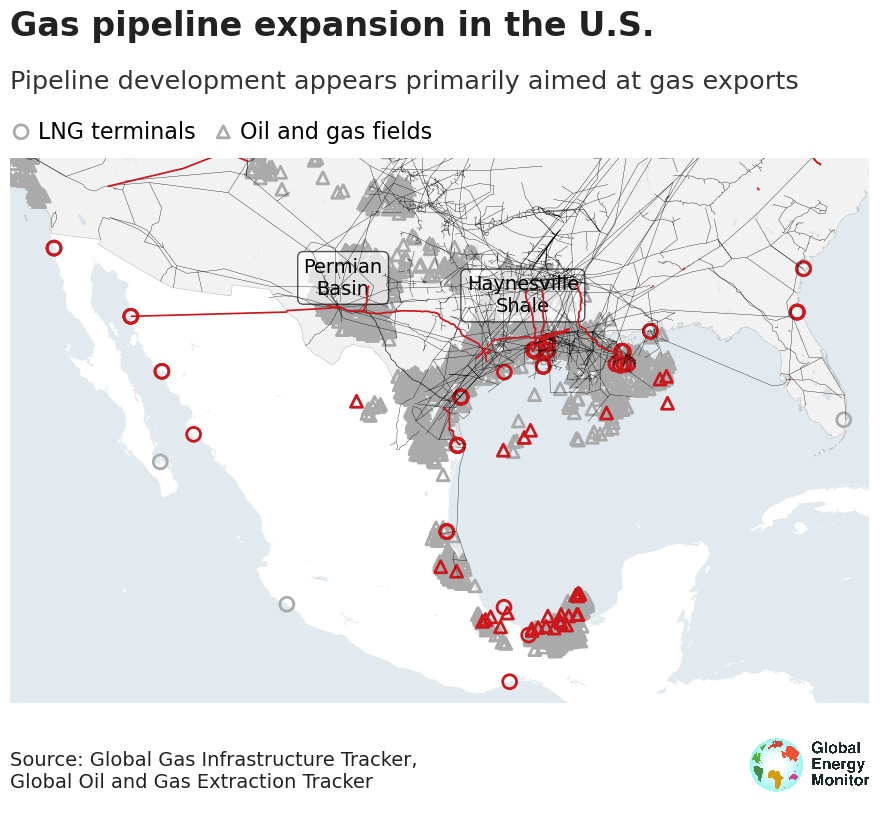

In [144]:
# projection info from here:
# https://gis.stackexchange.com/questions/141580/which-projection-is-best-for-mapping-the-contiguous-united-states
map_proj = cartopy.crs.AlbersEqualArea(central_longitude=-96.0,
                                       central_latitude=37.5,
                                       false_easting=0,
                                       false_northing=0,
                                       standard_parallels=[29.5,45.5])
data_proj = cartopy.crs.PlateCarree()

width_pixels = 640 # 640 default
height_pixels = 450 # 450 default
fig = mp.figure(figsize=(width_pixels/72, height_pixels/72))
fig.canvas.draw()

ax = fig.add_subplot(111, projection=map_proj)
ax.set_extent([-115,-81,15,36], crs=data_proj)


# LAND, LAKES, OCEAN
other_land = ax.add_geometries(countries_gdf.loc[countries_gdf.SOVEREIGNT!='United States of America']['geometry'], 
                               facecolor=other_land_color, 
                               edgecolor='None', 
                               crs=data_proj, 
                               alpha=other_land_alpha)

highlight_land = ax.add_geometries(countries_gdf.loc[countries_gdf.SOVEREIGNT=='United States of America']['geometry'], 
                                   facecolor=highlight_land_color, 
                                   edgecolor='0', 
                                   linewidth=0.5,
                                   crs=data_proj, alpha=highlight_land_alpha)

lakes = ax.add_geometries(lakes_gdf['geometry'], 
                          facecolor=water_color, 
                          edgecolor='None', 
                          crs=data_proj, 
                          alpha=water_alpha)

oceans = ax.add_geometries(oceans_gdf['geometry'], 
                           facecolor=water_color, 
                           edgecolor='None', 
                           crs=data_proj, 
                           alpha=water_alpha)


# PIPELINES
ax.add_geometries(pipes_gdf.loc[(pipes_gdf.Status.isin(['Operating']))&
                            (pipes_gdf.Countries.str.contains('United States')|
                             (pipes_gdf.PipelineName.str.contains('Energía')))]['geometry'], 
                  crs=data_proj, 
                  facecolor='None', 
                  edgecolor=operating_color, 
                  linewidth=operating_lw, zorder=5)

# PIPELINES
ax.add_geometries(pipes_gdf.loc[(pipes_gdf.Status.isin(['Construction','Proposed']))&
                            (pipes_gdf.Countries.str.contains('United States')|
                             (pipes_gdf.PipelineName.str.contains('Energía')))]['geometry'],
                  crs=data_proj, 
                  facecolor='None', 
                  edgecolor=construction_color,
                  linewidth=construction_lw, zorder=5,
                  label='Gas pipelines')

# TERMINALS
points_list = terms_gdf.loc[(terms_gdf.Status.isin(['Operating']))&
                            (terms_gdf.Country.isin(['United States','Mexico']))]['geometry'].tolist()
ax.scatter([point.x for point in points_list], 
           [point.y for point in points_list],
           transform=data_proj, 
           facecolor='None', 
           edgecolor=goget_color, 
           linewidth=2,
           zorder=3, marker='o',
           s=100, label='LNG terminals')

points_list = terms_gdf.loc[(terms_gdf.Status.isin(['Proposed','Construction']))&
                            (terms_gdf.Country.isin(['United States','Mexico']))]['geometry'].tolist()
ax.scatter([point.x for point in points_list], 
           [point.y for point in points_list],
           transform=data_proj, 
           facecolor='None', 
           edgecolor=construction_color, 
           linewidth=2,
           zorder=3, marker='o',
           s=100)

# GOGET
points_list = goget_gdf.loc[(~goget_gdf.Status.isin(['exploration', 'in development', 'discovered']))&
                            (goget_gdf.Country.isin(['United States','Mexico']))]['geometry'].tolist()
ax.scatter([point.x for point in points_list], 
           [point.y for point in points_list],
           transform=data_proj, 
           facecolor='None', 
           edgecolor=goget_color, 
           linewidth=2,
           zorder=2, alpha=1,
           marker='^',
           s=75, label='Oil and gas fields')

points_list = goget_gdf.loc[(goget_gdf.Status.isin(['exploration', 'in development', 'discovered']))&
                            (goget_gdf.Country.isin(['United States','Mexico']))]['geometry'].tolist()
ax.scatter([point.x for point in points_list], 
           [point.y for point in points_list],
           transform=data_proj, 
           facecolor='None', 
           edgecolor=construction_color, 
           linewidth=2,
           zorder=2, alpha=1,
           marker='^',
           s=75)

fig.tight_layout()
ax.axis('off')

# add titles, first get the location of the yaxis labels so they can line up exactly
# call it "x_location"
bbox = ax.get_tightbbox(renderer=fig.canvas.renderer)
x_location,y_location = ax.transAxes.inverted().transform([bbox.x0, bbox.y1])
legend = ax.legend(fontsize=base_size,
          frameon=False,
          loc='lower left',
          bbox_to_anchor=(x_location,1.025),
          bbox_transform=ax.transAxes,
          handlelength=1,
          handleheight=1,
          ncols=4,
          borderpad=0,
          borderaxespad=0,
          columnspacing=0.75,
          handletextpad=0.25)

# now get tight bbox again for further placement AFTER legend is added
bbox = ax.get_tightbbox(renderer=fig.canvas.renderer)
x_location,y_location = ax.transAxes.inverted().transform([bbox.x0, bbox.y1])
ax.text(s='Pipeline development appears primarily aimed at gas exports',
        size=base_size*1.15,
        color=color_subtitle,
        x=x_location,
        y=y_location+0.05,
        ha='left',
        va='bottom',
        weight=text_weight_normal,
        transform=ax.transAxes,
        linespacing=1.45,
        wrap=False)

bbox_with_subtitle = ax.get_tightbbox(renderer=fig.canvas.renderer)
x_location_subtitle,y_location_subtitle = ax.transAxes.inverted().transform([bbox_with_subtitle.x0, bbox_with_subtitle.y1])
ax.text(s='Gas pipeline expansion in the U.S.',
        size=base_size*1.5,
        color=color_title,
        x=x_location,
        y=y_location_subtitle+0.05,#1.2,
        ha='left',
        va='bottom',
        weight=text_weight_bold,
        transform=ax.transAxes,
        linespacing=1.35,
        wrap=False)

# ADD PERMIAN BASIN LABEL
props = dict(boxstyle='round', facecolor='1', alpha=0.666)
ax.text(x=-103,
        y=32.5,
        s='Permian\nBasin',
        ha='center',
        va='center',
        color='0',
        weight=550,
        size=base_size*0.875,
        transform=data_proj,
        bbox=props)

# ADD HAYNESVILLE SHALE LABEL
ax.text(x=-94.4136,
        y=32,
        s='Haynesville\nShale',
        ha='center',
        va='center',
        color='0',
        weight=550,
        size=base_size*0.875,
        transform=data_proj,
        bbox=props)

# GEM LOGO AND NOTES
gem_logo = matplotlib.image.imread('/Users/baird/Dropbox/_git_ALL/_github-repos-gem/gemplot-python/data/gem_logo_padding.png')
logo_image_box = matplotlib.offsetbox.OffsetImage(gem_logo, zoom=0.035)
logo_annotation_box = matplotlib.offsetbox.AnnotationBbox(logo_image_box,
                                                          (1,0), # sets box alignment to lower right corder
                                                          xycoords='axes fraction',
                                                          box_alignment=(1.,1.5), 
                                                          frameon=False)
ax.add_artist(logo_annotation_box)

# note at bottom
ax.text(s='Source: Global Gas Infrastructure Tracker,\n'+
            'Global Oil and Gas Extraction Tracker',
        size=base_size*0.875,
        color=color_title,
        x=x_location,
        y=-0.125*450/height_pixels,
        ha='left',
        va='center',
        weight=text_weight_normal,
        transform=ax.transAxes,
        linespacing=1.2,
        wrap=False)


fig.savefig('../figures/Figure05-USA-pipelines-LNG-terminals-map-GULF-focus.png', 
            dpi=600,
            bbox_inches='tight',
            transparent=False)

## fig 7 - australia map

In [ ]:
# projection info from here:
# https://www.icsm.gov.au/education/fundamentals-mapping/projections/commonly-used-map-projections
map_proj = cartopy.crs.LambertConformal(central_longitude=140.0,
                                       central_latitude=-25.0,
                                       false_easting=0,
                                       false_northing=0,
                                       standard_parallels=[-36.0,-18.0],
                                       cutoff=0)
data_proj = cartopy.crs.PlateCarree()

width_pixels = 640 # 640 default
height_pixels = 450 # 450 default
fig = mp.figure(figsize=(width_pixels/72, height_pixels/72))
fig.canvas.draw()

ax = fig.add_subplot(111, projection=map_proj)
ax.set_extent([113,155,-43,-7], crs=data_proj)

# LAND, LAKES, OCEAN
other_land = ax.add_geometries(countries_gdf.loc[countries_gdf.SOVEREIGNT!='Australia']['geometry'], 
                               facecolor=other_land_color, 
                               edgecolor='None', 
                               crs=data_proj, 
                               alpha=other_land_alpha)

highlight_land = ax.add_geometries(countries_gdf.loc[countries_gdf.SOVEREIGNT=='Australia']['geometry'], 
                                   facecolor=highlight_land_color, 
                                   edgecolor='0', 
                                   linewidth=0.5,
                                   crs=data_proj, alpha=highlight_land_alpha)

lakes = ax.add_geometries(lakes_gdf['geometry'], 
                          facecolor=water_color, 
                          edgecolor='None', 
                          crs=data_proj, 
                          alpha=water_alpha)

oceans = ax.add_geometries(oceans_gdf['geometry'], 
                           facecolor=water_color, 
                           edgecolor='None', 
                           crs=data_proj, 
                           alpha=water_alpha)


# PIPELINES
ax.add_geometries(pipes_gdf.loc[(pipes_gdf.Status.isin(['Operating']))&
                            (pipes_gdf.Countries.str.contains('Australia'))]['geometry'], 
                  crs=data_proj, 
                  facecolor='None', 
                  edgecolor=operating_color, 
                  linewidth=operating_lw, zorder=5)

# PIPELINES
ax.add_geometries(pipes_gdf.loc[(pipes_gdf.Status.isin(['Construction','Proposed']))&
                            (pipes_gdf.Countries.str.contains('Australia'))]['geometry'],
                  crs=data_proj, 
                  facecolor='None', 
                  edgecolor=construction_color,
                  linewidth=construction_lw, zorder=5,
                  label='Gas pipelines')

ax.add_geometries(pipes_gdf.loc[(pipes_gdf.Status.isin(['Shelved']))&
                            (pipes_gdf.Countries.str.contains('Australia'))]['geometry'], 
                  crs=data_proj, 
                  facecolor='None', 
                  edgecolor='darkorange',
                  linewidth=construction_lw, zorder=5,
                  label='Gas pipelines')

# TERMINALS
points_list = terms_gdf.loc[(terms_gdf.Status.isin(['Operating']))&
                            (terms_gdf.Country.isin(['Australia']))]['geometry'].tolist()
ax.scatter([point.x for point in points_list], 
           [point.y for point in points_list],
           transform=data_proj, 
           facecolor='None', 
           edgecolor=goget_color, 
           linewidth=2,
           zorder=3, marker='o',
           s=100, label='LNG terminals')

points_list = terms_gdf.loc[(terms_gdf.Status.isin(['Proposed','Construction']))&
                            (terms_gdf.Country.isin(['Australia']))]['geometry'].tolist()
ax.scatter([point.x for point in points_list], 
           [point.y for point in points_list],
           transform=data_proj, 
           facecolor='None', 
           edgecolor=construction_color, 
           linewidth=2,
           zorder=3, marker='o',
           s=100)

# GOGET
points_list = goget_gdf.loc[(~goget_gdf.Status.isin(['exploration', 'in development', 'discovered']))&
                            (goget_gdf.Country.isin(['Australia']))]['geometry'].tolist()
ax.scatter([point.x for point in points_list], 
           [point.y for point in points_list],
           transform=data_proj, 
           facecolor='None', 
           edgecolor=goget_color, 
           linewidth=2,
           zorder=2, alpha=1,
           marker='^',
           s=75, label='Oil and gas fields')

points_list = goget_gdf.loc[(goget_gdf.Status.isin(['exploration', 'in development', 'discovered']))&
                            (goget_gdf.Country.isin(['Australia']))]['geometry'].tolist()
ax.scatter([point.x for point in points_list], 
           [point.y for point in points_list],
           transform=data_proj, 
           facecolor='None', 
           edgecolor=construction_color, 
           linewidth=2,
           zorder=2, alpha=1,
           marker='^',
           s=75)

fig.tight_layout()
ax.axis('off')

# add titles, first get the location of the yaxis labels so they can line up exactly
# call it "x_location"
bbox = ax.get_tightbbox(renderer=fig.canvas.renderer)
x_location,y_location = ax.transAxes.inverted().transform([bbox.x0, bbox.y1])
legend = ax.legend(fontsize=base_size,
          frameon=False,
          loc='lower left',
          bbox_to_anchor=(x_location,1.025),
          bbox_transform=ax.transAxes,
          handlelength=1,
          handleheight=1,
          ncols=4,
          borderpad=0,
          borderaxespad=0,
          columnspacing=0.75,
          handletextpad=0.25)

# now get tight bbox again for further placement AFTER legend is added
bbox = ax.get_tightbbox(renderer=fig.canvas.renderer)
x_location,y_location = ax.transAxes.inverted().transform([bbox.x0, bbox.y1])
ax.text(s='Development will increase export capacity and tap\nexisting and in-development oil and gas fields',
        size=base_size*1.15,
        color=color_subtitle,
        x=x_location,
        y=y_location+0.05,
        ha='left',
        va='bottom',
        weight=text_weight_normal,
        transform=ax.transAxes,
        linespacing=1.45,
        wrap=False)

bbox_with_subtitle = ax.get_tightbbox(renderer=fig.canvas.renderer)
x_location_subtitle,y_location_subtitle = ax.transAxes.inverted().transform([bbox_with_subtitle.x0, bbox_with_subtitle.y1])
ax.text(s='Gas pipeline expansion in Australia',
        size=base_size*1.5,
        color=color_title,
        x=x_location,
        y=y_location_subtitle+0.05,#1.2,
        ha='left',
        va='bottom',
        weight=text_weight_bold,
        transform=ax.transAxes,
        linespacing=1.35,
        wrap=False)

# GEM LOGO AND NOTES
gem_logo = matplotlib.image.imread('/Users/baird/Dropbox/_git_ALL/_github-repos-gem/gemplot-python/data/gem_logo_padding.png')
logo_image_box = matplotlib.offsetbox.OffsetImage(gem_logo, zoom=0.035)
logo_annotation_box = matplotlib.offsetbox.AnnotationBbox(logo_image_box,
                                                          (1,0), # sets box alignment to lower right corder
                                                          xycoords='axes fraction',
                                                          box_alignment=(1.,1.5), 
                                                          frameon=False)
ax.add_artist(logo_annotation_box)

# note at bottom
ax.text(s='Source: Global Gas Infrastructure Tracker,\n'+
            'Global Oil and Gas Extraction Tracker',
        size=base_size*0.875,
        color=color_title,
        x=x_location,
        y=-0.11*450/height_pixels,
        ha='left',
        va='center',
        weight=text_weight_normal,
        transform=ax.transAxes,
        linespacing=1.2,
        wrap=False)

fig.savefig('../figures/Figure06-Australia-pipelines-LNG-terminals-map.png', 
            dpi=600,
            bbox_inches='tight',
            transparent=False)

## fig 8 - south america

In [ ]:
# south america projection here
# https://gis.stackexchange.com/questions/111515/projected-coordinate-system-for-south-america

# projection info from here:
# https://gis.stackexchange.com/questions/141580/which-projection-is-best-for-mapping-the-contiguous-united-states
map_proj = cartopy.crs.AlbersEqualArea(central_longitude=-60,
                                       central_latitude=-32,
                                       false_easting=0,
                                       false_northing=0,
                                       standard_parallels=[-42,-5])
data_proj = cartopy.crs.PlateCarree()

width_pixels = 640 # 640 default
height_pixels = 600 # 450 default
fig = mp.figure(figsize=(width_pixels/72, height_pixels/72))
fig.canvas.draw()

ax = fig.add_subplot(111, projection=map_proj)
ax.set_extent([-83,-35,-58,15], crs=data_proj)

# LAND, LAKES, OCEAN
other_land = ax.add_geometries(countries_gdf.loc[~countries_gdf.SUBREGION.isin(['South America','Western Europe'])]['geometry'], 
                               facecolor=other_land_color, 
                               edgecolor='None', 
                               crs=data_proj, 
                               alpha=other_land_alpha)

highlight_land = ax.add_geometries(countries_gdf.loc[countries_gdf.SUBREGION.isin(['South America','Western Europe'])]['geometry'], 
                                   facecolor=highlight_land_color, 
                                   edgecolor='0', 
                                   linewidth=0.5,
                                   crs=data_proj, alpha=highlight_land_alpha)

lakes = ax.add_geometries(lakes_gdf['geometry'], 
                          facecolor=water_color, 
                          edgecolor='None', 
                          crs=data_proj, 
                          alpha=water_alpha)

oceans = ax.add_geometries(oceans_gdf['geometry'], 
                           facecolor=water_color, 
                           edgecolor='None', 
                           crs=data_proj, 
                           alpha=water_alpha)

# PIPELINES
ax.add_geometries(pipes_gdf.loc[(pipes_gdf.Status.isin(['Operating']))&
                            (pipes_gdf.StartRegion.str.contains('Americas'))]['geometry'], 
                  crs=data_proj, 
                  facecolor='None', 
                  edgecolor=operating_color, 
                  linewidth=operating_lw, zorder=5)

# PIPELINES
ax.add_geometries(pipes_gdf.loc[(pipes_gdf.Status.isin(['Construction','Proposed']))&
                            (pipes_gdf.StartRegion.str.contains('Americas'))]['geometry'],
                  crs=data_proj, 
                  facecolor='None', 
                  edgecolor=construction_color,
                  linewidth=construction_lw, zorder=5,
                  label='Gas pipelines')

# TERMINALS
points_list = terms_gdf.loc[(terms_gdf.Status.isin(['Operating']))&
                            (terms_gdf.Region.isin(['Americas']))]['geometry'].tolist()
ax.scatter([point.x for point in points_list], 
           [point.y for point in points_list],
           transform=data_proj, 
           facecolor='None', 
           edgecolor=goget_color, 
           linewidth=2,
           zorder=3, marker='o',
           s=100, label='LNG terminals')

points_list = terms_gdf.loc[(terms_gdf.Status.isin(['Proposed','Construction']))&
                            (terms_gdf.Region.isin(['Americas']))]['geometry'].tolist()
ax.scatter([point.x for point in points_list], 
           [point.y for point in points_list],
           transform=data_proj, 
           facecolor='None', 
           edgecolor=construction_color, 
           linewidth=2,
           zorder=3, marker='o',
           s=100)

# GOGET
points_list = goget_gdf.loc[(~goget_gdf.Status.isin(['exploration', 'in development', 'discovered']))]['geometry'].tolist()
ax.scatter([point.x for point in points_list], 
           [point.y for point in points_list],
           transform=data_proj, 
           facecolor='None', 
           edgecolor=goget_color, 
           linewidth=2,
           zorder=2, alpha=1,
           marker='^',
           s=75, label='Oil and gas fields')

points_list = goget_gdf.loc[(goget_gdf.Status.isin(['exploration', 'in development', 'discovered']))]['geometry'].tolist()
ax.scatter([point.x for point in points_list], 
           [point.y for point in points_list],
           transform=data_proj, 
           facecolor='None', 
           edgecolor=construction_color, 
           linewidth=2,
           zorder=2, alpha=1,
           marker='^',
           s=75)

fig.tight_layout()
ax.axis('off')

# add titles, first get the location of the yaxis labels so they can line up exactly
# call it "x_location"
bbox = ax.get_tightbbox(renderer=fig.canvas.renderer)
x_location,y_location = ax.transAxes.inverted().transform([bbox.x0, bbox.y1])
legend = ax.legend(fontsize=base_size,
          frameon=False,
          loc='lower left',
          bbox_to_anchor=(x_location,1.025),
          bbox_transform=ax.transAxes,
          handlelength=1,
          handleheight=1,
          ncols=4,
          borderpad=0,
          borderaxespad=0,
          columnspacing=0.75,
          handletextpad=0.25)

# now get tight bbox again for further placement AFTER legend is added
bbox = ax.get_tightbbox(renderer=fig.canvas.renderer)
x_location,y_location = ax.transAxes.inverted().transform([bbox.x0, bbox.y1])
ax.text(s='Major buildout in development, driven by\nrecent connection to Vaca Muerta shale',
        size=base_size*1.15,
        color=color_subtitle,
        x=x_location,
        y=y_location+0.075,
        ha='left',
        va='center',
        weight=text_weight_normal,
        transform=ax.transAxes,
        linespacing=1.45,
        wrap=False)

bbox_with_subtitle = ax.get_tightbbox(renderer=fig.canvas.renderer)
x_location_subtitle,y_location_subtitle = ax.transAxes.inverted().transform([bbox_with_subtitle.x0, bbox_with_subtitle.y1])
ax.text(s='Gas pipeline expansion in\nSouth America',
        size=base_size*1.5,
        color=color_title,
        x=x_location,
        y=y_location_subtitle+0.075,#1.2,
        ha='left',
        va='center',
        weight=text_weight_bold,
        transform=ax.transAxes,
        linespacing=1.35,
        wrap=False)

# GEM LOGO AND NOTES
gem_logo = matplotlib.image.imread('/Users/baird/Dropbox/_git_ALL/_github-repos-gem/gemplot-python/data/gem_logo_padding.png')
logo_image_box = matplotlib.offsetbox.OffsetImage(gem_logo, zoom=0.035)
logo_annotation_box = matplotlib.offsetbox.AnnotationBbox(logo_image_box,
                                                          (1,0), # sets box alignment to lower right corder
                                                          xycoords='axes fraction',
                                                          box_alignment=(1.,1.5), 
                                                          frameon=False)
ax.add_artist(logo_annotation_box)


# ADD VACA MUERTA SHALE LABEL
props = dict(boxstyle='round', facecolor='1', alpha=0.333)
ax.text(x=-69.5,
        y=-38.2,
        s='Vaca\nMuerta',
        ha='center',
        va='center',
        color='0',
        weight=550,
        size=base_size*0.666,
        transform=data_proj,
        bbox=props)

# note at bottom
ax.text(s='Source: Global Gas Infrastructure Tracker,\n'+
            'Global Oil and Gas Extraction Tracker',
        size=base_size*0.875,
        color=color_title,
        x=x_location,
        y=-0.1*450/height_pixels,
        ha='left',
        va='center',
        weight=text_weight_normal,
        transform=ax.transAxes,
        linespacing=1.2,
        wrap=False)

fig.savefig('../figures/Figure07-SouthAmerica-pipelines-LNG-terminals-map.png', 
            dpi=600,
            bbox_inches='tight',
            transparent=False)